# Check the OOI IFCB data for Blurred Images using `cleanvision

[`CleanVision`](https://cleanvision.readthedocs.io/en/latest/index.html) is a package that is used to autmatically detect issues with image data.

In order to get this to work without making directories of .png files, we can create a loader class that inherits from `TorchVision.VisionDataset`.

Using the `pyifcb` library, load an roi file and make dataset from that.


In [31]:
from cleanvision import Imagelab
import ifcb
import os
from torch.utils.data import Dataset
from torchvision.datasets import VisionDataset
import numpy as np
import torch
import PIL
import tqdm

In [12]:
## This is allow us to load roi files (FilesetBin) object directly into a torchVision dataset to be used

from PIL import Image

class IFCBFromBinDataset(VisionDataset):
    def __init__(self, fileset_bin, transform=None):
        """
        :param fileset_bin: a loaded FilesetBin instance
        :param transform: torchvision transform to apply to each image
        """
        super().__init__(root=None, transform=transform)
        self.bin = fileset_bin
        self.image_keys = sorted(self.bin.images.keys())

    def __len__(self):
        return len(self.image_keys)

    def __getitem__(self, idx):
        roi_idx = self.image_keys[idx]
        image_np = self.bin.images[roi_idx]  # numpy array
        image = Image.fromarray(image_np)

        if self.transform:
            image = self.transform(image)

        return image, roi_idx  # You could also return just image

In [3]:
sample_name = "D20250314T062424_IFCB199"

## Load FilesetBin
year = sample_name[1:5]
yearmnth = sample_name[1:7]
full_path = f"/home/jovyan/ooi/uncabled/CP10CNSM/R00001/cg_data/dcl27/plims/{year}/{yearmnth}/{sample_name}.roi"
if os.path.isfile(full_path):
    print(f"Found {os.path.basename(full_path)}")
roi = ifcb.open_raw(full_path)
print(f"{os.path.basename(full_path)} has {roi.hdr_attributes['roiCount']} images")

dataset = IFCBFromBinDataset(roi)
imagelab = Imagelab(torchvision_dataset=dataset)

Found D20240522T042505_IFCB199.roi
D20240522T042505_IFCB199.roi has 2375 images


<FilesetBin /home/jovyan/ooi/uncabled/CP10CNSM/R00001/cg_data/dcl27/plims/2024/202405/D20240522T042505_IFCB199>

In [4]:
dataset = IFCBFromBinDataset(roi)
imagelab = Imagelab(torchvision_dataset=dataset)

Checking for blurry images ...


  0%|          | 0/2375 [00:00<?, ?it/s]

Issue checks completed. 25 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type   |   num_images |
|---:|:-------------|-------------:|
|  0 | blurry       |           25 | 

---------------------- blurry images -----------------------

Number of examples with this issue: 25
Examples representing most severe instances of this issue:



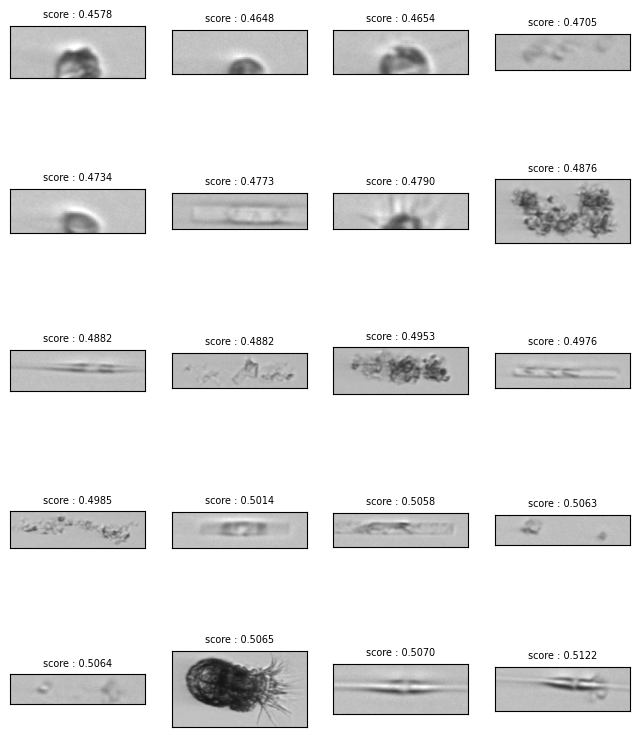

In [5]:
issue_types = {"blurry": {"threshold": 0.6}}
imagelab.find_issues(issue_types)
imagelab.report(num_images=20)

## CleanVision with a blurry example

[D20250314T062424_IFCB199](https://ifcb-data.oceanobservatories.org/timeline?dataset=PioneerMABMoored&bin=D20250314T062424_IFCB199)

In [6]:
sample_name = "D20250314T062424_IFCB199"

## Load FilesetBin
year = sample_name[1:5]
yearmnth = sample_name[1:7]
full_path = f"/home/jovyan/ooi/uncabled/CP10CNSM/R00001/cg_data/dcl27/plims/{year}/{yearmnth}/{sample_name}.roi"
if os.path.isfile(full_path):
    print(f"Found {os.path.basename(full_path)}")
roi = ifcb.open_raw(full_path)
print(f"{os.path.basename(full_path)} has {roi.hdr_attributes['roiCount']} images")

dataset = IFCBFromBinDataset(roi)
imagelab = Imagelab(torchvision_dataset=dataset)

Found D20250314T062424_IFCB199.roi
D20250314T062424_IFCB199.roi has 4297 images


Checking for blurry images ...


  0%|          | 0/4297 [00:00<?, ?it/s]

Issue checks completed. 77 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type   |   num_images |
|---:|:-------------|-------------:|
|  0 | blurry       |           77 | 

---------------------- blurry images -----------------------

Number of examples with this issue: 77
Examples representing most severe instances of this issue:



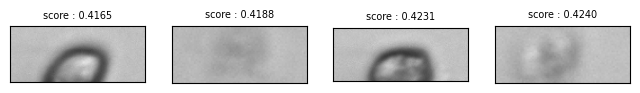

In [7]:
imagelab.find_issues(issue_types)
imagelab.report(num_images=20)

In [9]:
sample_name = "D20250404T122401_IFCB199"

## Load FilesetBin
year = sample_name[1:5]
yearmnth = sample_name[1:7]
full_path = f"/home/jovyan/ooi/uncabled/CP10CNSM/R00001/cg_data/dcl27/plims/{year}/{yearmnth}/{sample_name}.roi"
if os.path.isfile(full_path):
    print(f"Found {os.path.basename(full_path)}")
roi = ifcb.open_raw(full_path)
print(f"{os.path.basename(full_path)} has {roi.hdr_attributes['roiCount']} images")

dataset = IFCBFromBinDataset(roi)
imagelab = Imagelab(torchvision_dataset=dataset)

Found D20250404T122401_IFCB199.roi
D20250404T122401_IFCB199.roi has 9425 images


Checking for blurry images ...


  0%|          | 0/9425 [00:00<?, ?it/s]

Issue checks completed. 1945 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type   |   num_images |
|---:|:-------------|-------------:|
|  0 | blurry       |         1945 | 

---------------------- blurry images -----------------------

Number of examples with this issue: 1945
Examples representing most severe instances of this issue:



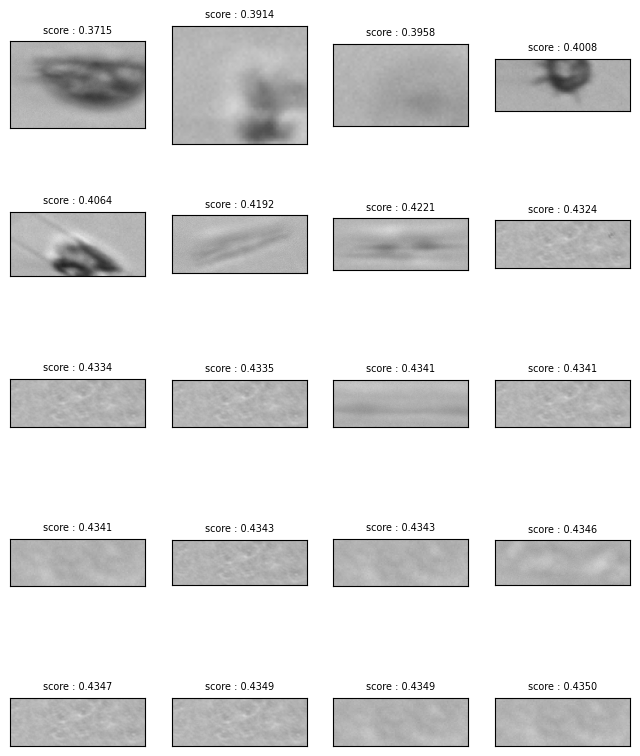

In [10]:
imagelab.find_issues(issue_types)
imagelab.report(num_images=20)

In [19]:

issue_types = {"blurry": {"threshold": 0.6}} # Higher treshold == More Images flagged
imagelab.find_issues(issue_types)
num_blur = imagelab.issues.query("is_blurry_issue == True").shape[0]

1945

In [76]:
sample_name = "D20250404T122401_IFCB199"

def load_dataset_sample(sample_name):
    ## Load FilesetBin
    year = sample_name[1:5]
    yearmnth = sample_name[1:7]
    full_path = f"/home/jovyan/ooi/uncabled/CP10CNSM/R00001/cg_data/dcl27/plims/{year}/{yearmnth}/{sample_name}.roi"
    roi = ifcb.open_raw(full_path)
    dataset = IFCBFromBinDataset(roi)
    return Imagelab(torchvision_dataset=dataset)
    
def check_blurred_images(sample_name, threshold=0.6):
    try:
        imagelab = load_dataset_sample(sample_name)
        issue_types = {"blurry": {"threshold": threshold}} # Higher treshold == More Images flagged
        imagelab.find_issues(issue_types,verbose=False,);
        num_blur = imagelab.issues.query("is_blurry_issue == True").shape[0]
    except:
        num_blur = np.nan
    return num_blur
    

In [77]:
check_blurred_images(sample_name)

  0%|          | 0/9425 [00:00<?, ?it/s]

1945

In [79]:
import glob
rois = glob.glob("/home/jovyan/ooi/uncabled/CP10CNSM/R00001/cg_data/dcl27/plims/2024/*/*.roi")
rois = [os.path.basename(r).split(".")[0] for r in rois]

In [80]:
blurred = []
for roi in tqdm.tqdm(rois):
    blurred.append(check_blurred_images(roi))

  0%|          | 0/1221 [00:00<?, ?it/s]

  0%|          | 0/1604 [00:00<?, ?it/s]

  0%|          | 1/1221 [00:00<08:33,  2.38it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/2127 [00:00<?, ?it/s]

  0%|          | 3/1221 [00:00<06:17,  3.23it/s]

  0%|          | 0/1046 [00:00<?, ?it/s]

  0%|          | 4/1221 [00:01<05:56,  3.41it/s]

  0%|          | 0/1625 [00:00<?, ?it/s]

  0%|          | 5/1221 [00:01<06:32,  3.10it/s]

  0%|          | 0/673 [00:00<?, ?it/s]

  0%|          | 6/1221 [00:01<05:32,  3.65it/s]

  0%|          | 0/450 [00:00<?, ?it/s]

  1%|          | 7/1221 [00:01<04:34,  4.42it/s]

  0%|          | 0/2345 [00:00<?, ?it/s]

  1%|          | 8/1221 [00:02<06:37,  3.05it/s]

  0%|          | 0/1484 [00:00<?, ?it/s]

  1%|          | 9/1221 [00:02<06:49,  2.96it/s]

  0%|          | 0/2112 [00:00<?, ?it/s]

  1%|          | 10/1221 [00:03<07:50,  2.58it/s]

  0%|          | 0/967 [00:00<?, ?it/s]

  1%|          | 11/1221 [00:03<06:55,  2.91it/s]

  0%|          | 0/1432 [00:00<?, ?it/s]

  1%|          | 12/1221 [00:03<07:00,  2.88it/s]

  0%|          | 0/1116 [00:00<?, ?it/s]

  1%|          | 13/1221 [00:04<06:32,  3.08it/s]

  0%|          | 0/1151 [00:00<?, ?it/s]

  1%|          | 14/1221 [00:04<06:15,  3.22it/s]

  0%|          | 0/1435 [00:00<?, ?it/s]

  1%|          | 15/1221 [00:04<06:28,  3.10it/s]

  0%|          | 0/1340 [00:00<?, ?it/s]

  1%|▏         | 16/1221 [00:05<06:30,  3.09it/s]

  0%|          | 0/1777 [00:00<?, ?it/s]

  1%|▏         | 17/1221 [00:05<07:09,  2.80it/s]

  0%|          | 0/1417 [00:00<?, ?it/s]

  1%|▏         | 18/1221 [00:05<07:03,  2.84it/s]

  0%|          | 0/1581 [00:00<?, ?it/s]

  2%|▏         | 19/1221 [00:06<07:14,  2.76it/s]

  0%|          | 0/826 [00:00<?, ?it/s]

  2%|▏         | 20/1221 [00:06<06:19,  3.17it/s]

  0%|          | 0/2448 [00:00<?, ?it/s]

  2%|▏         | 21/1221 [00:07<07:58,  2.51it/s]

  0%|          | 0/1081 [00:00<?, ?it/s]

  2%|▏         | 22/1221 [00:07<07:12,  2.77it/s]

  0%|          | 0/1487 [00:00<?, ?it/s]

  2%|▏         | 23/1221 [00:07<07:10,  2.78it/s]

  0%|          | 0/932 [00:00<?, ?it/s]

  2%|▏         | 24/1221 [00:07<06:24,  3.11it/s]

  0%|          | 0/675 [00:00<?, ?it/s]

  2%|▏         | 25/1221 [00:08<05:34,  3.57it/s]

  0%|          | 0/748 [00:00<?, ?it/s]

  2%|▏         | 26/1221 [00:08<05:03,  3.94it/s]

  0%|          | 0/907 [00:00<?, ?it/s]

  2%|▏         | 27/1221 [00:08<04:55,  4.03it/s]

  0%|          | 0/2734 [00:00<?, ?it/s]

  2%|▏         | 28/1221 [00:09<07:18,  2.72it/s]

  0%|          | 0/1393 [00:00<?, ?it/s]

  2%|▏         | 29/1221 [00:09<07:09,  2.78it/s]

  0%|          | 0/1191 [00:00<?, ?it/s]

  2%|▏         | 30/1221 [00:09<06:44,  2.94it/s]

  0%|          | 0/1991 [00:00<?, ?it/s]

  3%|▎         | 31/1221 [00:10<07:24,  2.68it/s]

  0%|          | 0/1298 [00:00<?, ?it/s]

  3%|▎         | 32/1221 [00:10<07:04,  2.80it/s]

  0%|          | 0/1827 [00:00<?, ?it/s]

  3%|▎         | 33/1221 [00:11<07:30,  2.63it/s]

  0%|          | 0/1775 [00:00<?, ?it/s]

  3%|▎         | 34/1221 [00:11<07:48,  2.53it/s]

  0%|          | 0/1962 [00:00<?, ?it/s]

  3%|▎         | 35/1221 [00:11<08:12,  2.41it/s]

  0%|          | 0/1789 [00:00<?, ?it/s]

  3%|▎         | 36/1221 [00:12<08:17,  2.38it/s]

  0%|          | 0/696 [00:00<?, ?it/s]

  3%|▎         | 37/1221 [00:12<06:52,  2.87it/s]

  0%|          | 0/1019 [00:00<?, ?it/s]

  3%|▎         | 38/1221 [00:12<06:19,  3.12it/s]

  0%|          | 0/1506 [00:00<?, ?it/s]

  3%|▎         | 39/1221 [00:13<06:33,  3.01it/s]

  0%|          | 0/1441 [00:00<?, ?it/s]

  3%|▎         | 40/1221 [00:13<06:38,  2.96it/s]

  0%|          | 0/1658 [00:00<?, ?it/s]

  3%|▎         | 41/1221 [00:13<06:57,  2.83it/s]

  0%|          | 0/755 [00:00<?, ?it/s]

  3%|▎         | 42/1221 [00:14<06:02,  3.26it/s]

  0%|          | 0/2252 [00:00<?, ?it/s]

  4%|▎         | 43/1221 [00:14<07:22,  2.66it/s]

  0%|          | 0/1472 [00:00<?, ?it/s]

  4%|▎         | 44/1221 [00:15<07:17,  2.69it/s]

  0%|          | 0/667 [00:00<?, ?it/s]

  4%|▎         | 45/1221 [00:15<06:07,  3.20it/s]

  0%|          | 0/1609 [00:00<?, ?it/s]

  4%|▍         | 46/1221 [00:15<06:33,  2.98it/s]

  0%|          | 0/1110 [00:00<?, ?it/s]

  4%|▍         | 47/1221 [00:15<06:09,  3.17it/s]

  0%|          | 0/743 [00:00<?, ?it/s]

  4%|▍         | 48/1221 [00:16<05:24,  3.61it/s]

  0%|          | 0/1297 [00:00<?, ?it/s]

  4%|▍         | 49/1221 [00:16<05:36,  3.48it/s]

  0%|          | 0/1195 [00:00<?, ?it/s]

  4%|▍         | 50/1221 [00:16<05:38,  3.46it/s]

  0%|          | 0/681 [00:00<?, ?it/s]

  4%|▍         | 51/1221 [00:16<04:58,  3.91it/s]

  0%|          | 0/465 [00:00<?, ?it/s]

  4%|▍         | 52/1221 [00:16<04:13,  4.61it/s]

  0%|          | 0/2402 [00:00<?, ?it/s]

  4%|▍         | 53/1221 [00:17<06:16,  3.10it/s]

  0%|          | 0/2586 [00:00<?, ?it/s]

  4%|▍         | 54/1221 [00:18<07:48,  2.49it/s]

  0%|          | 0/1473 [00:00<?, ?it/s]

  5%|▍         | 55/1221 [00:18<07:35,  2.56it/s]

  0%|          | 0/638 [00:00<?, ?it/s]

  5%|▍         | 56/1221 [00:18<06:14,  3.11it/s]

  0%|          | 0/1214 [00:00<?, ?it/s]

  5%|▍         | 57/1221 [00:18<06:06,  3.18it/s]

  0%|          | 0/547 [00:00<?, ?it/s]

  5%|▍         | 58/1221 [00:19<05:06,  3.79it/s]

  0%|          | 0/1995 [00:00<?, ?it/s]

  5%|▍         | 59/1221 [00:19<06:24,  3.03it/s]

  0%|          | 0/2481 [00:00<?, ?it/s]

  5%|▍         | 60/1221 [00:20<07:51,  2.46it/s]

  0%|          | 0/1567 [00:00<?, ?it/s]

  5%|▍         | 61/1221 [00:20<07:37,  2.53it/s]

  0%|          | 0/1548 [00:00<?, ?it/s]

  5%|▌         | 62/1221 [00:20<07:31,  2.57it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

  5%|▌         | 63/1221 [00:21<07:00,  2.75it/s]

  0%|          | 0/1643 [00:00<?, ?it/s]

  5%|▌         | 64/1221 [00:21<07:13,  2.67it/s]

  0%|          | 0/2031 [00:00<?, ?it/s]

  5%|▌         | 65/1221 [00:22<07:48,  2.47it/s]

  0%|          | 0/1651 [00:00<?, ?it/s]

  5%|▌         | 66/1221 [00:22<07:37,  2.52it/s]

  0%|          | 0/1940 [00:00<?, ?it/s]

  5%|▌         | 67/1221 [00:22<07:57,  2.42it/s]

  0%|          | 0/2036 [00:00<?, ?it/s]

  6%|▌         | 68/1221 [00:23<08:22,  2.30it/s]

  0%|          | 0/1557 [00:00<?, ?it/s]

  6%|▌         | 69/1221 [00:23<08:03,  2.38it/s]

  0%|          | 0/1872 [00:00<?, ?it/s]

  6%|▌         | 70/1221 [00:24<08:12,  2.34it/s]

  0%|          | 0/1107 [00:00<?, ?it/s]

  6%|▌         | 71/1221 [00:24<07:16,  2.63it/s]

  0%|          | 0/1287 [00:00<?, ?it/s]

  6%|▌         | 72/1221 [00:24<06:50,  2.80it/s]

  0%|          | 0/1976 [00:00<?, ?it/s]

  6%|▌         | 73/1221 [00:25<07:29,  2.55it/s]

  0%|          | 0/1580 [00:00<?, ?it/s]

  6%|▌         | 74/1221 [00:25<07:25,  2.58it/s]

  0%|          | 0/2061 [00:00<?, ?it/s]

  6%|▌         | 75/1221 [00:26<07:58,  2.39it/s]

  0%|          | 0/2841 [00:00<?, ?it/s]

  6%|▌         | 76/1221 [00:26<09:23,  2.03it/s]

  0%|          | 0/1010 [00:00<?, ?it/s]

  6%|▋         | 77/1221 [00:27<08:00,  2.38it/s]

  0%|          | 0/1114 [00:00<?, ?it/s]

  6%|▋         | 78/1221 [00:27<07:11,  2.65it/s]

  0%|          | 0/1105 [00:00<?, ?it/s]

  6%|▋         | 79/1221 [00:27<06:33,  2.90it/s]

  0%|          | 0/1614 [00:00<?, ?it/s]

  7%|▋         | 80/1221 [00:27<06:46,  2.81it/s]

  0%|          | 0/1655 [00:00<?, ?it/s]

  7%|▋         | 81/1221 [00:28<06:58,  2.73it/s]

  0%|          | 0/1328 [00:00<?, ?it/s]

  7%|▋         | 82/1221 [00:28<06:43,  2.82it/s]

  0%|          | 0/1202 [00:00<?, ?it/s]

  7%|▋         | 83/1221 [00:28<06:24,  2.96it/s]

  0%|          | 0/1504 [00:00<?, ?it/s]

  7%|▋         | 84/1221 [00:29<06:32,  2.90it/s]

  0%|          | 0/1029 [00:00<?, ?it/s]

  7%|▋         | 85/1221 [00:29<06:00,  3.15it/s]

  0%|          | 0/1053 [00:00<?, ?it/s]

  7%|▋         | 86/1221 [00:29<05:40,  3.34it/s]

  0%|          | 0/228 [00:00<?, ?it/s]

  0%|          | 0/283 [00:00<?, ?it/s]

  7%|▋         | 88/1221 [00:30<03:42,  5.09it/s]

  0%|          | 0/1399 [00:00<?, ?it/s]

  7%|▋         | 89/1221 [00:30<04:23,  4.30it/s]

  0%|          | 0/197 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

  7%|▋         | 91/1221 [00:30<03:03,  6.14it/s]

  0%|          | 0/207 [00:00<?, ?it/s]

  0%|          | 0/499 [00:00<?, ?it/s]

  8%|▊         | 93/1221 [00:30<02:40,  7.04it/s]

  0%|          | 0/488 [00:00<?, ?it/s]

  8%|▊         | 94/1221 [00:30<02:37,  7.17it/s]

  0%|          | 0/331 [00:00<?, ?it/s]

  0%|          | 0/2594 [00:00<?, ?it/s]

  8%|▊         | 96/1221 [00:31<04:09,  4.51it/s]

  0%|          | 0/579 [00:00<?, ?it/s]

  8%|▊         | 97/1221 [00:31<03:53,  4.81it/s]

  0%|          | 0/213 [00:00<?, ?it/s]

  0%|          | 0/384 [00:00<?, ?it/s]

  8%|▊         | 99/1221 [00:31<03:02,  6.16it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/372 [00:00<?, ?it/s]

  8%|▊         | 101/1221 [00:32<02:33,  7.28it/s]

  0%|          | 0/655 [00:00<?, ?it/s]

  8%|▊         | 102/1221 [00:32<02:41,  6.91it/s]

  0%|          | 0/251 [00:00<?, ?it/s]

  0%|          | 0/274 [00:00<?, ?it/s]

  9%|▊         | 104/1221 [00:32<02:15,  8.25it/s]

  0%|          | 0/1770 [00:00<?, ?it/s]

  9%|▊         | 105/1221 [00:32<03:25,  5.44it/s]

  0%|          | 0/907 [00:00<?, ?it/s]

  9%|▊         | 106/1221 [00:33<03:37,  5.13it/s]

  0%|          | 0/223 [00:00<?, ?it/s]

  0%|          | 0/351 [00:00<?, ?it/s]

  9%|▉         | 108/1221 [00:33<02:49,  6.58it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

  0%|          | 0/432 [00:00<?, ?it/s]

  9%|▉         | 110/1221 [00:33<02:23,  7.75it/s]

  0%|          | 0/284 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  9%|▉         | 112/1221 [00:33<02:00,  9.21it/s]

  0%|          | 0/243 [00:00<?, ?it/s]

  0%|          | 0/956 [00:00<?, ?it/s]

  9%|▉         | 114/1221 [00:33<02:16,  8.11it/s]

  0%|          | 0/305 [00:00<?, ?it/s]

  0%|          | 0/510 [00:00<?, ?it/s]

 10%|▉         | 116/1221 [00:34<02:14,  8.23it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

 10%|▉         | 117/1221 [00:34<02:41,  6.82it/s]

  0%|          | 0/273 [00:00<?, ?it/s]

  0%|          | 0/482 [00:00<?, ?it/s]

 10%|▉         | 119/1221 [00:34<02:25,  7.59it/s]

  0%|          | 0/565 [00:00<?, ?it/s]

 10%|▉         | 120/1221 [00:34<02:30,  7.34it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

 10%|▉         | 121/1221 [00:34<02:24,  7.59it/s]

  0%|          | 0/969 [00:00<?, ?it/s]

 10%|▉         | 122/1221 [00:35<02:51,  6.42it/s]

  0%|          | 0/581 [00:00<?, ?it/s]

 10%|█         | 123/1221 [00:35<02:51,  6.41it/s]

  0%|          | 0/198 [00:00<?, ?it/s]

  0%|          | 0/336 [00:00<?, ?it/s]

 10%|█         | 125/1221 [00:35<02:17,  7.98it/s]

  0%|          | 0/333 [00:00<?, ?it/s]

  0%|          | 0/423 [00:00<?, ?it/s]

 10%|█         | 127/1221 [00:35<02:08,  8.48it/s]

  0%|          | 0/591 [00:00<?, ?it/s]

 10%|█         | 128/1221 [00:35<02:17,  7.95it/s]

  0%|          | 0/477 [00:00<?, ?it/s]

 11%|█         | 129/1221 [00:35<02:17,  7.91it/s]

  0%|          | 0/310 [00:00<?, ?it/s]

  0%|          | 0/352 [00:00<?, ?it/s]

 11%|█         | 131/1221 [00:36<02:03,  8.81it/s]

  0%|          | 0/360 [00:00<?, ?it/s]

 11%|█         | 132/1221 [00:36<02:00,  9.03it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/1611 [00:00<?, ?it/s]

 11%|█         | 134/1221 [00:36<02:52,  6.28it/s]

  0%|          | 0/456 [00:00<?, ?it/s]

 11%|█         | 135/1221 [00:36<02:44,  6.61it/s]

  0%|          | 0/316 [00:00<?, ?it/s]

  0%|          | 0/1962 [00:00<?, ?it/s]

 11%|█         | 137/1221 [00:37<03:41,  4.90it/s]

  0%|          | 0/310 [00:00<?, ?it/s]

  0%|          | 0/281 [00:00<?, ?it/s]

 11%|█▏        | 139/1221 [00:37<02:57,  6.08it/s]

  0%|          | 0/265 [00:00<?, ?it/s]

  0%|          | 0/319 [00:00<?, ?it/s]

 12%|█▏        | 141/1221 [00:37<02:28,  7.28it/s]

  0%|          | 0/711 [00:00<?, ?it/s]

 12%|█▏        | 142/1221 [00:37<02:35,  6.92it/s]

  0%|          | 0/307 [00:00<?, ?it/s]

  0%|          | 0/254 [00:00<?, ?it/s]

 12%|█▏        | 144/1221 [00:38<02:13,  8.09it/s]

  0%|          | 0/396 [00:00<?, ?it/s]

 12%|█▏        | 145/1221 [00:38<02:10,  8.26it/s]

  0%|          | 0/228 [00:00<?, ?it/s]

  0%|          | 0/398 [00:00<?, ?it/s]

 12%|█▏        | 147/1221 [00:38<01:58,  9.08it/s]

  0%|          | 0/409 [00:00<?, ?it/s]

 12%|█▏        | 148/1221 [00:38<01:58,  9.06it/s]

  0%|          | 0/312 [00:00<?, ?it/s]

  0%|          | 0/194 [00:00<?, ?it/s]

 12%|█▏        | 150/1221 [00:38<01:45, 10.20it/s]

  0%|          | 0/534 [00:00<?, ?it/s]

  0%|          | 0/323 [00:00<?, ?it/s]

 12%|█▏        | 152/1221 [00:38<01:52,  9.49it/s]

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/428 [00:00<?, ?it/s]

 13%|█▎        | 154/1221 [00:39<01:50,  9.61it/s]

  0%|          | 0/464 [00:00<?, ?it/s]

 13%|█▎        | 155/1221 [00:39<01:55,  9.20it/s]

  0%|          | 0/331 [00:00<?, ?it/s]

  0%|          | 0/433 [00:00<?, ?it/s]

 13%|█▎        | 157/1221 [00:39<01:54,  9.26it/s]

  0%|          | 0/164 [00:00<?, ?it/s]

  0%|          | 0/369 [00:00<?, ?it/s]

 13%|█▎        | 159/1221 [00:39<01:45, 10.06it/s]

  0%|          | 0/286 [00:00<?, ?it/s]

  0%|          | 0/486 [00:00<?, ?it/s]

 13%|█▎        | 161/1221 [00:39<01:49,  9.67it/s]

  0%|          | 0/538 [00:00<?, ?it/s]

 13%|█▎        | 162/1221 [00:39<01:57,  9.02it/s]

  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/486 [00:00<?, ?it/s]

 13%|█▎        | 164/1221 [00:40<01:54,  9.20it/s]

  0%|          | 0/301 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

 14%|█▎        | 166/1221 [00:40<01:56,  9.04it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/265 [00:00<?, ?it/s]

 14%|█▍        | 168/1221 [00:40<01:42, 10.27it/s]

  0%|          | 0/560 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

 14%|█▍        | 170/1221 [00:40<01:47,  9.77it/s]

  0%|          | 0/771 [00:00<?, ?it/s]

  0%|          | 0/441 [00:00<?, ?it/s]

 14%|█▍        | 172/1221 [00:41<02:04,  8.44it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

 14%|█▍        | 174/1221 [00:41<01:55,  9.07it/s]

  0%|          | 0/294 [00:00<?, ?it/s]

  0%|          | 0/583 [00:00<?, ?it/s]

 14%|█▍        | 176/1221 [00:41<01:58,  8.84it/s]

  0%|          | 0/476 [00:00<?, ?it/s]

 14%|█▍        | 177/1221 [00:41<02:02,  8.55it/s]

  0%|          | 0/247 [00:00<?, ?it/s]

  0%|          | 0/381 [00:00<?, ?it/s]

 15%|█▍        | 179/1221 [00:41<01:52,  9.28it/s]

  0%|          | 0/305 [00:00<?, ?it/s]

  0%|          | 0/2480 [00:00<?, ?it/s]

 15%|█▍        | 181/1221 [00:42<03:11,  5.43it/s]

  0%|          | 0/657 [00:00<?, ?it/s]

 15%|█▍        | 182/1221 [00:42<03:10,  5.44it/s]

  0%|          | 0/421 [00:00<?, ?it/s]

 15%|█▍        | 183/1221 [00:42<02:56,  5.87it/s]

  0%|          | 0/403 [00:00<?, ?it/s]

 15%|█▌        | 184/1221 [00:42<02:44,  6.30it/s]

  0%|          | 0/446 [00:00<?, ?it/s]

 15%|█▌        | 185/1221 [00:42<02:34,  6.70it/s]

  0%|          | 0/386 [00:00<?, ?it/s]

 15%|█▌        | 186/1221 [00:43<02:23,  7.22it/s]

  0%|          | 0/349 [00:00<?, ?it/s]

  0%|          | 0/360 [00:00<?, ?it/s]

 15%|█▌        | 188/1221 [00:43<02:04,  8.29it/s]

  0%|          | 0/265 [00:00<?, ?it/s]

  0%|          | 0/225 [00:00<?, ?it/s]

 16%|█▌        | 190/1221 [00:43<01:46,  9.67it/s]

  0%|          | 0/588 [00:00<?, ?it/s]

  0%|          | 0/671 [00:00<?, ?it/s]

 16%|█▌        | 192/1221 [00:43<02:08,  7.99it/s]

  0%|          | 0/433 [00:00<?, ?it/s]

 16%|█▌        | 193/1221 [00:43<02:06,  8.12it/s]

  0%|          | 0/415 [00:00<?, ?it/s]

 16%|█▌        | 194/1221 [00:43<02:04,  8.25it/s]

  0%|          | 0/441 [00:00<?, ?it/s]

 16%|█▌        | 195/1221 [00:44<02:03,  8.31it/s]

  0%|          | 0/417 [00:00<?, ?it/s]

 16%|█▌        | 196/1221 [00:44<02:01,  8.43it/s]

  0%|          | 0/370 [00:00<?, ?it/s]

 16%|█▌        | 197/1221 [00:44<01:57,  8.74it/s]

  0%|          | 0/267 [00:00<?, ?it/s]

  0%|          | 0/255 [00:00<?, ?it/s]

 16%|█▋        | 199/1221 [00:44<01:41, 10.03it/s]

  0%|          | 0/1941 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

 16%|█▋        | 201/1221 [00:45<02:49,  6.02it/s]

  0%|          | 0/308 [00:00<?, ?it/s]

  0%|          | 0/279 [00:00<?, ?it/s]

 17%|█▋        | 203/1221 [00:45<02:20,  7.22it/s]

  0%|          | 0/2332 [00:00<?, ?it/s]

 17%|█▋        | 204/1221 [00:45<03:45,  4.52it/s]

  0%|          | 0/332 [00:00<?, ?it/s]

  0%|          | 0/672 [00:00<?, ?it/s]

 17%|█▋        | 206/1221 [00:46<03:13,  5.24it/s]

  0%|          | 0/552 [00:00<?, ?it/s]

 17%|█▋        | 207/1221 [00:46<03:08,  5.37it/s]

  0%|          | 0/218 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

 17%|█▋        | 209/1221 [00:46<02:28,  6.81it/s]

  0%|          | 0/274 [00:00<?, ?it/s]

  0%|          | 0/214 [00:00<?, ?it/s]

 17%|█▋        | 211/1221 [00:46<02:02,  8.22it/s]

  0%|          | 0/1753 [00:00<?, ?it/s]

 17%|█▋        | 212/1221 [00:46<03:03,  5.49it/s]

  0%|          | 0/303 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

 18%|█▊        | 214/1221 [00:47<02:37,  6.40it/s]

  0%|          | 0/748 [00:00<?, ?it/s]

 18%|█▊        | 215/1221 [00:47<02:43,  6.16it/s]

  0%|          | 0/224 [00:00<?, ?it/s]

  0%|          | 0/521 [00:00<?, ?it/s]

 18%|█▊        | 217/1221 [00:47<02:20,  7.14it/s]

  0%|          | 0/260 [00:00<?, ?it/s]

  0%|          | 0/532 [00:00<?, ?it/s]

 18%|█▊        | 219/1221 [00:47<02:08,  7.78it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

 18%|█▊        | 220/1221 [00:47<02:05,  8.00it/s]

  0%|          | 0/417 [00:00<?, ?it/s]

 18%|█▊        | 221/1221 [00:47<02:02,  8.14it/s]

  0%|          | 0/413 [00:00<?, ?it/s]

 18%|█▊        | 222/1221 [00:48<02:00,  8.31it/s]

  0%|          | 0/152 [00:00<?, ?it/s]

  0%|          | 0/627 [00:00<?, ?it/s]

 18%|█▊        | 224/1221 [00:48<01:55,  8.61it/s]

  0%|          | 0/601 [00:00<?, ?it/s]

 18%|█▊        | 225/1221 [00:48<02:04,  8.02it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/354 [00:00<?, ?it/s]

 19%|█▊        | 227/1221 [00:48<01:51,  8.90it/s]

  0%|          | 0/748 [00:00<?, ?it/s]

 19%|█▊        | 228/1221 [00:48<02:09,  7.68it/s]

  0%|          | 0/428 [00:00<?, ?it/s]

 19%|█▉        | 229/1221 [00:48<02:05,  7.92it/s]

  0%|          | 0/584 [00:00<?, ?it/s]

 19%|█▉        | 230/1221 [00:49<02:13,  7.45it/s]

  0%|          | 0/546 [00:00<?, ?it/s]

 19%|█▉        | 231/1221 [00:49<02:14,  7.35it/s]

  0%|          | 0/289 [00:00<?, ?it/s]

  0%|          | 0/320 [00:00<?, ?it/s]

 19%|█▉        | 233/1221 [00:49<01:55,  8.58it/s]

  0%|          | 0/516 [00:00<?, ?it/s]

 19%|█▉        | 234/1221 [00:49<01:59,  8.25it/s]

  0%|          | 0/506 [00:00<?, ?it/s]

 19%|█▉        | 235/1221 [00:49<02:03,  8.01it/s]

  0%|          | 0/285 [00:00<?, ?it/s]

  0%|          | 0/323 [00:00<?, ?it/s]

 19%|█▉        | 237/1221 [00:49<01:46,  9.21it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/683 [00:00<?, ?it/s]

 20%|█▉        | 239/1221 [00:50<01:53,  8.64it/s]

  0%|          | 0/238 [00:00<?, ?it/s]

  0%|          | 0/716 [00:00<?, ?it/s]

 20%|█▉        | 241/1221 [00:50<01:57,  8.31it/s]

  0%|          | 0/415 [00:00<?, ?it/s]

 20%|█▉        | 242/1221 [00:50<01:56,  8.43it/s]

  0%|          | 0/364 [00:00<?, ?it/s]

 20%|█▉        | 243/1221 [00:50<01:53,  8.59it/s]

  0%|          | 0/416 [00:00<?, ?it/s]

 20%|█▉        | 244/1221 [00:50<01:52,  8.69it/s]

  0%|          | 0/473 [00:00<?, ?it/s]

 20%|██        | 245/1221 [00:50<01:55,  8.46it/s]

  0%|          | 0/366 [00:00<?, ?it/s]

 20%|██        | 246/1221 [00:50<01:50,  8.81it/s]

  0%|          | 0/2789 [00:00<?, ?it/s]

 20%|██        | 247/1221 [00:51<04:57,  3.27it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/67 [00:00<?, ?it/s]

 20%|██        | 250/1221 [00:51<02:34,  6.28it/s]

  0%|          | 0/7187 [00:00<?, ?it/s]

  0%|          | 0/7208 [00:00<?, ?it/s]

 21%|██        | 252/1221 [00:55<11:31,  1.40it/s]

  0%|          | 0/159 [00:00<?, ?it/s]

  0%|          | 0/7083 [00:00<?, ?it/s]

 21%|██        | 254/1221 [00:57<12:25,  1.30it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/7174 [00:00<?, ?it/s]

 21%|██        | 257/1221 [00:59<12:37,  1.27it/s]

  0%|          | 0/7255 [00:00<?, ?it/s]

 21%|██        | 258/1221 [01:01<16:36,  1.03s/it]

  0%|          | 0/7310 [00:00<?, ?it/s]

 21%|██        | 259/1221 [01:04<20:26,  1.28s/it]

  0%|          | 0/238 [00:00<?, ?it/s]

 21%|██▏       | 260/1221 [01:04<16:47,  1.05s/it]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/222 [00:00<?, ?it/s]

 21%|██▏       | 262/1221 [01:04<11:11,  1.43it/s]

  0%|          | 0/7179 [00:00<?, ?it/s]

 22%|██▏       | 263/1221 [01:06<16:23,  1.03s/it]

  0%|          | 0/7383 [00:00<?, ?it/s]

 22%|██▏       | 264/1221 [01:09<21:16,  1.33s/it]

  0%|          | 0/318 [00:00<?, ?it/s]

 22%|██▏       | 265/1221 [01:09<16:35,  1.04s/it]

  0%|          | 0/7264 [00:00<?, ?it/s]

 22%|██▏       | 266/1221 [01:11<21:32,  1.35s/it]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/7417 [00:00<?, ?it/s]

 22%|██▏       | 268/1221 [01:14<20:25,  1.29s/it]

  0%|          | 0/215 [00:00<?, ?it/s]

 22%|██▏       | 269/1221 [01:14<16:25,  1.04s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

 22%|██▏       | 271/1221 [01:14<10:10,  1.56it/s]

  0%|          | 0/6884 [00:00<?, ?it/s]

 22%|██▏       | 272/1221 [01:16<15:45,  1.00it/s]

  0%|          | 0/7055 [00:00<?, ?it/s]

 22%|██▏       | 273/1221 [01:18<20:17,  1.28s/it]

  0%|          | 0/7198 [00:00<?, ?it/s]

 22%|██▏       | 274/1221 [01:20<23:49,  1.51s/it]

  0%|          | 0/424 [00:00<?, ?it/s]

 23%|██▎       | 275/1221 [01:21<18:03,  1.15s/it]

  0%|          | 0/7028 [00:00<?, ?it/s]

 23%|██▎       | 276/1221 [01:23<22:47,  1.45s/it]

  0%|          | 0/6917 [00:00<?, ?it/s]

 23%|██▎       | 277/1221 [01:25<26:13,  1.67s/it]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/7498 [00:00<?, ?it/s]

 23%|██▎       | 279/1221 [01:28<23:02,  1.47s/it]

  0%|          | 0/675 [00:00<?, ?it/s]

 23%|██▎       | 280/1221 [01:28<18:26,  1.18s/it]

  0%|          | 0/8062 [00:00<?, ?it/s]

 23%|██▎       | 281/1221 [01:30<23:47,  1.52s/it]

  0%|          | 0/7354 [00:00<?, ?it/s]

 23%|██▎       | 282/1221 [01:33<26:56,  1.72s/it]

  0%|          | 0/7232 [00:00<?, ?it/s]

 23%|██▎       | 284/1221 [01:35<22:36,  1.45s/it]

  0%|          | 0/7263 [00:00<?, ?it/s]

 23%|██▎       | 285/1221 [01:37<25:46,  1.65s/it]

  0%|          | 0/7076 [00:00<?, ?it/s]

 23%|██▎       | 286/1221 [01:39<27:57,  1.79s/it]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/3436 [00:00<?, ?it/s]

 24%|██▎       | 288/1221 [01:41<20:38,  1.33s/it]

  0%|          | 0/123 [00:00<?, ?it/s]

 24%|██▎       | 289/1221 [01:41<16:14,  1.05s/it]

  0%|          | 0/6792 [00:00<?, ?it/s]

 24%|██▍       | 290/1221 [01:43<20:39,  1.33s/it]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7420 [00:00<?, ?it/s]

 24%|██▍       | 293/1221 [01:45<16:19,  1.06s/it]

  0%|          | 0/7171 [00:00<?, ?it/s]

 24%|██▍       | 294/1221 [01:48<20:02,  1.30s/it]

  0%|          | 0/6833 [00:00<?, ?it/s]

 24%|██▍       | 295/1221 [01:50<23:23,  1.52s/it]

  0%|          | 0/7159 [00:00<?, ?it/s]

 24%|██▍       | 296/1221 [01:52<26:05,  1.69s/it]

  0%|          | 0/146 [00:00<?, ?it/s]

 24%|██▍       | 298/1221 [01:52<16:02,  1.04s/it]

  0%|          | 0/7472 [00:00<?, ?it/s]

 24%|██▍       | 299/1221 [01:55<20:26,  1.33s/it]

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/7155 [00:00<?, ?it/s]

 25%|██▍       | 301/1221 [01:57<18:53,  1.23s/it]

  0%|          | 0/7244 [00:00<?, ?it/s]

 25%|██▍       | 302/1221 [01:59<22:18,  1.46s/it]

  0%|          | 0/7264 [00:00<?, ?it/s]

 25%|██▍       | 303/1221 [02:01<25:32,  1.67s/it]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/7595 [00:00<?, ?it/s]

 25%|██▍       | 305/1221 [02:04<22:36,  1.48s/it]

  0%|          | 0/7049 [00:00<?, ?it/s]

 25%|██▌       | 306/1221 [02:06<25:16,  1.66s/it]

  0%|          | 0/7598 [00:00<?, ?it/s]

 25%|██▌       | 307/1221 [02:08<27:52,  1.83s/it]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/127 [00:00<?, ?it/s]

 25%|██▌       | 309/1221 [02:09<17:06,  1.13s/it]

  0%|          | 0/7047 [00:00<?, ?it/s]

 25%|██▌       | 310/1221 [02:11<20:44,  1.37s/it]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7223 [00:00<?, ?it/s]

 26%|██▌       | 313/1221 [02:13<16:11,  1.07s/it]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/7304 [00:00<?, ?it/s]

 26%|██▌       | 315/1221 [02:16<16:41,  1.11s/it]

  0%|          | 0/7098 [00:00<?, ?it/s]

 26%|██▌       | 316/1221 [02:18<19:26,  1.29s/it]

  0%|          | 0/6988 [00:00<?, ?it/s]

 26%|██▌       | 317/1221 [02:20<22:27,  1.49s/it]

  0%|          | 0/7100 [00:00<?, ?it/s]

 26%|██▌       | 318/1221 [02:22<25:00,  1.66s/it]

  0%|          | 0/6880 [00:00<?, ?it/s]

 26%|██▌       | 319/1221 [02:24<26:34,  1.77s/it]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6878 [00:00<?, ?it/s]

 26%|██▋       | 321/1221 [02:26<21:57,  1.46s/it]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

 26%|██▋       | 323/1221 [02:26<14:10,  1.06it/s]

  0%|          | 0/7114 [00:00<?, ?it/s]

 27%|██▋       | 324/1221 [02:29<18:04,  1.21s/it]

  0%|          | 0/7072 [00:00<?, ?it/s]

 27%|██▋       | 325/1221 [02:31<21:37,  1.45s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7327 [00:00<?, ?it/s]

 27%|██▋       | 327/1221 [02:33<19:55,  1.34s/it]

  0%|          | 0/6798 [00:00<?, ?it/s]

 27%|██▋       | 328/1221 [02:35<22:13,  1.49s/it]

  0%|          | 0/6948 [00:00<?, ?it/s]

 27%|██▋       | 329/1221 [02:37<24:03,  1.62s/it]

  0%|          | 0/7226 [00:00<?, ?it/s]

 27%|██▋       | 330/1221 [02:40<26:25,  1.78s/it]

  0%|          | 0/7773 [00:00<?, ?it/s]

 27%|██▋       | 331/1221 [02:42<28:56,  1.95s/it]

  0%|          | 0/6736 [00:00<?, ?it/s]

 27%|██▋       | 332/1221 [02:44<29:12,  1.97s/it]

  0%|          | 0/1381 [00:00<?, ?it/s]

 27%|██▋       | 333/1221 [02:45<23:41,  1.60s/it]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/7187 [00:00<?, ?it/s]

 27%|██▋       | 335/1221 [02:47<20:25,  1.38s/it]

  0%|          | 0/7191 [00:00<?, ?it/s]

 28%|██▊       | 336/1221 [02:49<23:24,  1.59s/it]

  0%|          | 0/7535 [00:00<?, ?it/s]

 28%|██▊       | 337/1221 [02:51<25:39,  1.74s/it]

  0%|          | 0/6606 [00:00<?, ?it/s]

 28%|██▊       | 338/1221 [02:53<27:08,  1.84s/it]

  0%|          | 0/136 [00:00<?, ?it/s]

  0%|          | 0/6992 [00:00<?, ?it/s]

 28%|██▊       | 340/1221 [02:56<22:25,  1.53s/it]

  0%|          | 0/7458 [00:00<?, ?it/s]

 28%|██▊       | 341/1221 [02:58<25:11,  1.72s/it]

  0%|          | 0/6961 [00:00<?, ?it/s]

 28%|██▊       | 342/1221 [03:00<26:32,  1.81s/it]

  0%|          | 0/7044 [00:00<?, ?it/s]

 28%|██▊       | 343/1221 [03:02<27:36,  1.89s/it]

  0%|          | 0/7528 [00:00<?, ?it/s]

 28%|██▊       | 345/1221 [03:04<22:36,  1.55s/it]

  0%|          | 0/7029 [00:00<?, ?it/s]

 28%|██▊       | 347/1221 [03:07<19:58,  1.37s/it]

  0%|          | 0/7263 [00:00<?, ?it/s]

 29%|██▊       | 348/1221 [03:09<22:36,  1.55s/it]

  0%|          | 0/6973 [00:00<?, ?it/s]

 29%|██▊       | 349/1221 [03:11<24:56,  1.72s/it]

  0%|          | 0/90 [00:00<?, ?it/s]

 29%|██▊       | 350/1221 [03:11<19:02,  1.31s/it]

  0%|          | 0/8516 [00:00<?, ?it/s]

 29%|██▉       | 352/1221 [03:14<18:54,  1.31s/it]

  0%|          | 0/307 [00:00<?, ?it/s]

 29%|██▉       | 353/1221 [03:14<15:00,  1.04s/it]

  0%|          | 0/1015 [00:00<?, ?it/s]

 29%|██▉       | 354/1221 [03:14<12:22,  1.17it/s]

  0%|          | 0/289 [00:00<?, ?it/s]

 29%|██▉       | 355/1221 [03:14<09:43,  1.48it/s]

  0%|          | 0/1056 [00:00<?, ?it/s]

 29%|██▉       | 356/1221 [03:15<08:17,  1.74it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

 29%|██▉       | 357/1221 [03:15<06:38,  2.17it/s]

  0%|          | 0/438 [00:00<?, ?it/s]

 29%|██▉       | 358/1221 [03:15<05:24,  2.66it/s]

  0%|          | 0/279 [00:00<?, ?it/s]

 29%|██▉       | 359/1221 [03:15<04:20,  3.31it/s]

  0%|          | 0/1370 [00:00<?, ?it/s]

 29%|██▉       | 360/1221 [03:15<04:34,  3.14it/s]

  0%|          | 0/1264 [00:00<?, ?it/s]

 30%|██▉       | 361/1221 [03:16<05:59,  2.39it/s]

  0%|          | 0/1287 [00:00<?, ?it/s]

 30%|██▉       | 362/1221 [03:16<05:39,  2.53it/s]

  0%|          | 0/1295 [00:00<?, ?it/s]

 30%|██▉       | 363/1221 [03:17<06:35,  2.17it/s]

  0%|          | 0/722 [00:00<?, ?it/s]

 30%|██▉       | 364/1221 [03:17<05:42,  2.50it/s]

  0%|          | 0/297 [00:00<?, ?it/s]

 30%|██▉       | 365/1221 [03:17<04:44,  3.01it/s]

  0%|          | 0/1098 [00:00<?, ?it/s]

 30%|██▉       | 366/1221 [03:18<04:40,  3.05it/s]

  0%|          | 0/435 [00:00<?, ?it/s]

 30%|███       | 367/1221 [03:18<03:53,  3.66it/s]

  0%|          | 0/1170 [00:00<?, ?it/s]

 30%|███       | 368/1221 [03:18<04:09,  3.42it/s]

  0%|          | 0/384 [00:00<?, ?it/s]

 30%|███       | 369/1221 [03:18<03:30,  4.04it/s]

  0%|          | 0/410 [00:00<?, ?it/s]

 30%|███       | 370/1221 [03:19<03:11,  4.45it/s]

  0%|          | 0/989 [00:00<?, ?it/s]

 30%|███       | 371/1221 [03:19<03:31,  4.01it/s]

  0%|          | 0/323 [00:00<?, ?it/s]

 30%|███       | 372/1221 [03:19<03:27,  4.09it/s]

  0%|          | 0/307 [00:00<?, ?it/s]

 31%|███       | 373/1221 [03:19<02:59,  4.72it/s]

  0%|          | 0/239 [00:00<?, ?it/s]

 31%|███       | 374/1221 [03:19<02:43,  5.19it/s]

  0%|          | 0/1087 [00:00<?, ?it/s]

 31%|███       | 375/1221 [03:20<03:13,  4.37it/s]

  0%|          | 0/362 [00:00<?, ?it/s]

 31%|███       | 376/1221 [03:20<03:22,  4.17it/s]

  0%|          | 0/1319 [00:00<?, ?it/s]

 31%|███       | 377/1221 [03:20<03:48,  3.69it/s]

  0%|          | 0/287 [00:00<?, ?it/s]

 31%|███       | 378/1221 [03:21<03:32,  3.97it/s]

  0%|          | 0/237 [00:00<?, ?it/s]

 31%|███       | 379/1221 [03:21<02:59,  4.69it/s]

  0%|          | 0/573 [00:00<?, ?it/s]

 31%|███       | 380/1221 [03:21<02:58,  4.72it/s]

  0%|          | 0/754 [00:00<?, ?it/s]

 31%|███       | 381/1221 [03:21<03:04,  4.54it/s]

  0%|          | 0/1456 [00:00<?, ?it/s]

 31%|███▏      | 382/1221 [03:22<04:54,  2.85it/s]

  0%|          | 0/296 [00:00<?, ?it/s]

 31%|███▏      | 383/1221 [03:22<04:20,  3.22it/s]

  0%|          | 0/1357 [00:00<?, ?it/s]

 31%|███▏      | 384/1221 [03:23<05:51,  2.38it/s]

  0%|          | 0/377 [00:00<?, ?it/s]

 32%|███▏      | 385/1221 [03:23<04:58,  2.80it/s]

  0%|          | 0/410 [00:00<?, ?it/s]

 32%|███▏      | 386/1221 [03:23<04:03,  3.43it/s]

  0%|          | 0/379 [00:00<?, ?it/s]

 32%|███▏      | 387/1221 [03:23<03:23,  4.09it/s]

  0%|          | 0/1375 [00:00<?, ?it/s]

 32%|███▏      | 388/1221 [03:24<03:58,  3.49it/s]

  0%|          | 0/339 [00:00<?, ?it/s]

 32%|███▏      | 389/1221 [03:24<03:50,  3.61it/s]

  0%|          | 0/333 [00:00<?, ?it/s]

 32%|███▏      | 390/1221 [03:24<03:41,  3.75it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/4028 [00:00<?, ?it/s]

 32%|███▏      | 392/1221 [03:25<06:07,  2.25it/s]

  0%|          | 0/2693 [00:00<?, ?it/s]

 32%|███▏      | 393/1221 [03:26<07:29,  1.84it/s]

  0%|          | 0/4961 [00:00<?, ?it/s]

 32%|███▏      | 394/1221 [03:28<11:08,  1.24it/s]

  0%|          | 0/4653 [00:00<?, ?it/s]

 32%|███▏      | 395/1221 [03:29<13:26,  1.02it/s]

  0%|          | 0/3611 [00:00<?, ?it/s]

 32%|███▏      | 396/1221 [03:30<13:43,  1.00it/s]

  0%|          | 0/6223 [00:00<?, ?it/s]

 33%|███▎      | 397/1221 [03:32<16:49,  1.22s/it]

  0%|          | 0/4254 [00:00<?, ?it/s]

 33%|███▎      | 398/1221 [03:33<17:22,  1.27s/it]

  0%|          | 0/5490 [00:00<?, ?it/s]

 33%|███▎      | 399/1221 [03:35<18:13,  1.33s/it]

  0%|          | 0/4234 [00:00<?, ?it/s]

 33%|███▎      | 400/1221 [03:36<17:50,  1.30s/it]

  0%|          | 0/7083 [00:00<?, ?it/s]

 33%|███▎      | 401/1221 [03:38<20:28,  1.50s/it]

  0%|          | 0/3423 [00:00<?, ?it/s]

 33%|███▎      | 402/1221 [03:39<18:24,  1.35s/it]

  0%|          | 0/5025 [00:00<?, ?it/s]

 33%|███▎      | 403/1221 [03:40<18:41,  1.37s/it]

  0%|          | 0/5745 [00:00<?, ?it/s]

 33%|███▎      | 404/1221 [03:42<19:34,  1.44s/it]

  0%|          | 0/2177 [00:00<?, ?it/s]

 33%|███▎      | 405/1221 [03:43<17:12,  1.26s/it]

  0%|          | 0/1916 [00:00<?, ?it/s]

 33%|███▎      | 406/1221 [03:43<13:57,  1.03s/it]

  0%|          | 0/2795 [00:00<?, ?it/s]

 33%|███▎      | 407/1221 [03:44<13:30,  1.00it/s]

  0%|          | 0/6391 [00:00<?, ?it/s]

 33%|███▎      | 408/1221 [03:46<16:37,  1.23s/it]

  0%|          | 0/3931 [00:00<?, ?it/s]

 33%|███▎      | 409/1221 [03:47<16:54,  1.25s/it]

  0%|          | 0/3844 [00:00<?, ?it/s]

 34%|███▎      | 410/1221 [03:49<16:40,  1.23s/it]

  0%|          | 0/4448 [00:00<?, ?it/s]

 34%|███▎      | 411/1221 [03:50<16:51,  1.25s/it]

  0%|          | 0/6684 [00:00<?, ?it/s]

 34%|███▎      | 412/1221 [03:52<19:02,  1.41s/it]

  0%|          | 0/6585 [00:00<?, ?it/s]

 34%|███▍      | 413/1221 [03:53<20:28,  1.52s/it]

  0%|          | 0/4073 [00:00<?, ?it/s]

 34%|███▍      | 414/1221 [03:55<19:47,  1.47s/it]

  0%|          | 0/3478 [00:00<?, ?it/s]

 34%|███▍      | 415/1221 [03:56<18:20,  1.37s/it]

  0%|          | 0/6731 [00:00<?, ?it/s]

 34%|███▍      | 416/1221 [03:58<19:59,  1.49s/it]

  0%|          | 0/5319 [00:00<?, ?it/s]

 34%|███▍      | 417/1221 [03:59<20:24,  1.52s/it]

  0%|          | 0/1290 [00:00<?, ?it/s]

 34%|███▍      | 418/1221 [04:00<15:45,  1.18s/it]

  0%|          | 0/3645 [00:00<?, ?it/s]

 34%|███▍      | 419/1221 [04:01<15:50,  1.18s/it]

  0%|          | 0/3607 [00:00<?, ?it/s]

 34%|███▍      | 420/1221 [04:02<15:47,  1.18s/it]

  0%|          | 0/4130 [00:00<?, ?it/s]

 34%|███▍      | 421/1221 [04:03<16:07,  1.21s/it]

  0%|          | 0/5234 [00:00<?, ?it/s]

 35%|███▍      | 422/1221 [04:05<17:11,  1.29s/it]

  0%|          | 0/3099 [00:00<?, ?it/s]

 35%|███▍      | 423/1221 [04:06<16:17,  1.23s/it]

  0%|          | 0/5691 [00:00<?, ?it/s]

 35%|███▍      | 424/1221 [04:07<17:42,  1.33s/it]

  0%|          | 0/2469 [00:00<?, ?it/s]

 35%|███▍      | 425/1221 [04:08<15:43,  1.18s/it]

  0%|          | 0/3423 [00:00<?, ?it/s]

 35%|███▍      | 426/1221 [04:09<14:40,  1.11s/it]

  0%|          | 0/2355 [00:00<?, ?it/s]

 35%|███▍      | 427/1221 [04:10<13:38,  1.03s/it]

  0%|          | 0/3357 [00:00<?, ?it/s]

 35%|███▌      | 428/1221 [04:11<12:52,  1.03it/s]

  0%|          | 0/2647 [00:00<?, ?it/s]

 35%|███▌      | 429/1221 [04:12<12:15,  1.08it/s]

  0%|          | 0/4195 [00:00<?, ?it/s]

 35%|███▌      | 430/1221 [04:13<13:23,  1.02s/it]

  0%|          | 0/4224 [00:00<?, ?it/s]

 35%|███▌      | 431/1221 [04:14<14:01,  1.07s/it]

  0%|          | 0/3949 [00:00<?, ?it/s]

 35%|███▌      | 432/1221 [04:15<14:24,  1.10s/it]

  0%|          | 0/3893 [00:00<?, ?it/s]

 35%|███▌      | 433/1221 [04:16<14:33,  1.11s/it]

  0%|          | 0/3245 [00:00<?, ?it/s]

 36%|███▌      | 434/1221 [04:17<14:07,  1.08s/it]

  0%|          | 0/5438 [00:00<?, ?it/s]

 36%|███▌      | 435/1221 [04:19<15:51,  1.21s/it]

  0%|          | 0/5384 [00:00<?, ?it/s]

 36%|███▌      | 436/1221 [04:21<17:34,  1.34s/it]

  0%|          | 0/4088 [00:00<?, ?it/s]

 36%|███▌      | 437/1221 [04:22<16:43,  1.28s/it]

  0%|          | 0/4062 [00:00<?, ?it/s]

 36%|███▌      | 438/1221 [04:23<16:57,  1.30s/it]

  0%|          | 0/4158 [00:00<?, ?it/s]

 36%|███▌      | 439/1221 [04:24<16:28,  1.26s/it]

  0%|          | 0/5393 [00:00<?, ?it/s]

 36%|███▌      | 440/1221 [04:26<17:10,  1.32s/it]

  0%|          | 0/3637 [00:00<?, ?it/s]

 36%|███▌      | 441/1221 [04:27<16:51,  1.30s/it]

  0%|          | 0/6656 [00:00<?, ?it/s]

 36%|███▌      | 442/1221 [04:29<18:31,  1.43s/it]

  0%|          | 0/1773 [00:00<?, ?it/s]

 36%|███▋      | 443/1221 [04:29<14:52,  1.15s/it]

  0%|          | 0/6878 [00:00<?, ?it/s]

 36%|███▋      | 444/1221 [04:31<17:09,  1.32s/it]

  0%|          | 0/3029 [00:00<?, ?it/s]

 36%|███▋      | 445/1221 [04:32<15:33,  1.20s/it]

  0%|          | 0/5555 [00:00<?, ?it/s]

 37%|███▋      | 446/1221 [04:33<17:00,  1.32s/it]

  0%|          | 0/5313 [00:00<?, ?it/s]

 37%|███▋      | 447/1221 [04:35<17:37,  1.37s/it]

  0%|          | 0/4304 [00:00<?, ?it/s]

 37%|███▋      | 448/1221 [04:36<17:17,  1.34s/it]

  0%|          | 0/3505 [00:00<?, ?it/s]

 37%|███▋      | 449/1221 [04:37<16:08,  1.26s/it]

  0%|          | 0/4639 [00:00<?, ?it/s]

 37%|███▋      | 450/1221 [04:38<15:57,  1.24s/it]

  0%|          | 0/1577 [00:00<?, ?it/s]

 37%|███▋      | 451/1221 [04:39<12:45,  1.01it/s]

  0%|          | 0/4553 [00:00<?, ?it/s]

 37%|███▋      | 452/1221 [04:40<14:06,  1.10s/it]

  0%|          | 0/3156 [00:00<?, ?it/s]

 37%|███▋      | 453/1221 [04:41<14:16,  1.11s/it]

  0%|          | 0/1457 [00:00<?, ?it/s]

 37%|███▋      | 454/1221 [04:42<11:29,  1.11it/s]

  0%|          | 0/2563 [00:00<?, ?it/s]

 37%|███▋      | 455/1221 [04:43<11:23,  1.12it/s]

  0%|          | 0/4182 [00:00<?, ?it/s]

 37%|███▋      | 456/1221 [04:44<12:05,  1.05it/s]

  0%|          | 0/5112 [00:00<?, ?it/s]

 37%|███▋      | 457/1221 [04:45<13:47,  1.08s/it]

  0%|          | 0/4443 [00:00<?, ?it/s]

 38%|███▊      | 458/1221 [04:47<15:13,  1.20s/it]

  0%|          | 0/2104 [00:00<?, ?it/s]

 38%|███▊      | 459/1221 [04:47<12:38,  1.00it/s]

  0%|          | 0/3634 [00:00<?, ?it/s]

 38%|███▊      | 460/1221 [04:48<12:45,  1.01s/it]

  0%|          | 0/5934 [00:00<?, ?it/s]

 38%|███▊      | 461/1221 [04:50<14:57,  1.18s/it]

  0%|          | 0/4186 [00:00<?, ?it/s]

 38%|███▊      | 462/1221 [04:51<14:59,  1.18s/it]

  0%|          | 0/2187 [00:00<?, ?it/s]

 38%|███▊      | 463/1221 [04:52<13:20,  1.06s/it]

  0%|          | 0/2005 [00:00<?, ?it/s]

 38%|███▊      | 464/1221 [04:52<11:42,  1.08it/s]

  0%|          | 0/4499 [00:00<?, ?it/s]

 38%|███▊      | 465/1221 [04:54<12:48,  1.02s/it]

  0%|          | 0/4183 [00:00<?, ?it/s]

 38%|███▊      | 466/1221 [04:55<13:14,  1.05s/it]

  0%|          | 0/3801 [00:00<?, ?it/s]

 38%|███▊      | 467/1221 [04:56<13:39,  1.09s/it]

  0%|          | 0/3175 [00:00<?, ?it/s]

 38%|███▊      | 468/1221 [04:57<13:02,  1.04s/it]

  0%|          | 0/3559 [00:00<?, ?it/s]

 38%|███▊      | 469/1221 [04:58<13:28,  1.08s/it]

  0%|          | 0/1742 [00:00<?, ?it/s]

 38%|███▊      | 470/1221 [04:58<11:04,  1.13it/s]

  0%|          | 0/6676 [00:00<?, ?it/s]

 39%|███▊      | 471/1221 [05:00<14:33,  1.16s/it]

  0%|          | 0/6450 [00:00<?, ?it/s]

 39%|███▊      | 472/1221 [05:02<17:03,  1.37s/it]

  0%|          | 0/3564 [00:00<?, ?it/s]

 39%|███▊      | 473/1221 [05:03<15:59,  1.28s/it]

  0%|          | 0/6104 [00:00<?, ?it/s]

 39%|███▉      | 474/1221 [05:05<17:08,  1.38s/it]

  0%|          | 0/3572 [00:00<?, ?it/s]

 39%|███▉      | 475/1221 [05:06<15:44,  1.27s/it]

  0%|          | 0/3980 [00:00<?, ?it/s]

 39%|███▉      | 476/1221 [05:07<15:42,  1.26s/it]

  0%|          | 0/5224 [00:00<?, ?it/s]

 39%|███▉      | 477/1221 [05:08<16:26,  1.33s/it]

  0%|          | 0/4644 [00:00<?, ?it/s]

 39%|███▉      | 478/1221 [05:10<16:18,  1.32s/it]

  0%|          | 0/4898 [00:00<?, ?it/s]

 39%|███▉      | 479/1221 [05:11<16:42,  1.35s/it]

  0%|          | 0/6118 [00:00<?, ?it/s]

 39%|███▉      | 480/1221 [05:13<17:49,  1.44s/it]

  0%|          | 0/3914 [00:00<?, ?it/s]

 39%|███▉      | 481/1221 [05:14<16:30,  1.34s/it]

  0%|          | 0/5547 [00:00<?, ?it/s]

 39%|███▉      | 482/1221 [05:16<17:31,  1.42s/it]

  0%|          | 0/4658 [00:00<?, ?it/s]

 40%|███▉      | 483/1221 [05:17<17:11,  1.40s/it]

  0%|          | 0/2293 [00:00<?, ?it/s]

 40%|███▉      | 484/1221 [05:18<14:45,  1.20s/it]

  0%|          | 0/5279 [00:00<?, ?it/s]

 40%|███▉      | 485/1221 [05:19<15:44,  1.28s/it]

  0%|          | 0/6560 [00:00<?, ?it/s]

 40%|███▉      | 486/1221 [05:21<17:49,  1.46s/it]

  0%|          | 0/3866 [00:00<?, ?it/s]

 40%|███▉      | 487/1221 [05:22<16:42,  1.37s/it]

  0%|          | 0/1495 [00:00<?, ?it/s]

 40%|███▉      | 488/1221 [05:23<13:11,  1.08s/it]

  0%|          | 0/4518 [00:00<?, ?it/s]

 40%|████      | 489/1221 [05:24<14:13,  1.17s/it]

  0%|          | 0/6133 [00:00<?, ?it/s]

 40%|████      | 490/1221 [05:26<16:07,  1.32s/it]

  0%|          | 0/1950 [00:00<?, ?it/s]

 40%|████      | 491/1221 [05:26<13:36,  1.12s/it]

  0%|          | 0/4842 [00:00<?, ?it/s]

 40%|████      | 492/1221 [05:28<14:43,  1.21s/it]

  0%|          | 0/1474 [00:00<?, ?it/s]

 40%|████      | 493/1221 [05:28<11:49,  1.03it/s]

  0%|          | 0/2292 [00:00<?, ?it/s]

 40%|████      | 494/1221 [05:29<11:10,  1.08it/s]

  0%|          | 0/2730 [00:00<?, ?it/s]

 41%|████      | 495/1221 [05:30<10:48,  1.12it/s]

  0%|          | 0/2674 [00:00<?, ?it/s]

 41%|████      | 496/1221 [05:31<10:38,  1.14it/s]

  0%|          | 0/5138 [00:00<?, ?it/s]

 41%|████      | 497/1221 [05:32<12:59,  1.08s/it]

  0%|          | 0/3831 [00:00<?, ?it/s]

 41%|████      | 498/1221 [05:33<13:28,  1.12s/it]

  0%|          | 0/5354 [00:00<?, ?it/s]

 41%|████      | 499/1221 [05:35<14:19,  1.19s/it]

  0%|          | 0/4539 [00:00<?, ?it/s]

 41%|████      | 500/1221 [05:36<14:37,  1.22s/it]

  0%|          | 0/4747 [00:00<?, ?it/s]

 41%|████      | 501/1221 [05:37<14:58,  1.25s/it]

  0%|          | 0/2080 [00:00<?, ?it/s]

 41%|████      | 502/1221 [05:38<13:15,  1.11s/it]

  0%|          | 0/4901 [00:00<?, ?it/s]

 41%|████      | 503/1221 [05:39<13:49,  1.16s/it]

  0%|          | 0/2734 [00:00<?, ?it/s]

 41%|████▏     | 504/1221 [05:40<12:57,  1.08s/it]

  0%|          | 0/3380 [00:00<?, ?it/s]

 41%|████▏     | 505/1221 [05:41<13:08,  1.10s/it]

  0%|          | 0/3412 [00:00<?, ?it/s]

 41%|████▏     | 506/1221 [05:42<12:44,  1.07s/it]

  0%|          | 0/4052 [00:00<?, ?it/s]

 42%|████▏     | 507/1221 [05:43<12:58,  1.09s/it]

  0%|          | 0/4292 [00:00<?, ?it/s]

 42%|████▏     | 508/1221 [05:45<13:19,  1.12s/it]

  0%|          | 0/5436 [00:00<?, ?it/s]

 42%|████▏     | 509/1221 [05:46<14:50,  1.25s/it]

  0%|          | 0/3666 [00:00<?, ?it/s]

 42%|████▏     | 510/1221 [05:47<14:38,  1.23s/it]

  0%|          | 0/6336 [00:00<?, ?it/s]

 42%|████▏     | 511/1221 [05:49<16:08,  1.36s/it]

  0%|          | 0/1632 [00:00<?, ?it/s]

 42%|████▏     | 512/1221 [05:50<12:46,  1.08s/it]

  0%|          | 0/7272 [00:00<?, ?it/s]

 42%|████▏     | 513/1221 [05:51<15:33,  1.32s/it]

  0%|          | 0/5581 [00:00<?, ?it/s]

 42%|████▏     | 514/1221 [05:53<16:23,  1.39s/it]

  0%|          | 0/5420 [00:00<?, ?it/s]

 42%|████▏     | 515/1221 [05:55<17:17,  1.47s/it]

  0%|          | 0/4905 [00:00<?, ?it/s]

 42%|████▏     | 516/1221 [05:56<16:45,  1.43s/it]

  0%|          | 0/6353 [00:00<?, ?it/s]

 42%|████▏     | 517/1221 [05:58<17:52,  1.52s/it]

  0%|          | 0/5414 [00:00<?, ?it/s]

 42%|████▏     | 518/1221 [05:59<17:28,  1.49s/it]

  0%|          | 0/4137 [00:00<?, ?it/s]

 43%|████▎     | 519/1221 [06:00<16:18,  1.39s/it]

  0%|          | 0/5553 [00:00<?, ?it/s]

 43%|████▎     | 520/1221 [06:02<16:41,  1.43s/it]

  0%|          | 0/5356 [00:00<?, ?it/s]

 43%|████▎     | 521/1221 [06:03<16:40,  1.43s/it]

  0%|          | 0/1619 [00:00<?, ?it/s]

 43%|████▎     | 522/1221 [06:04<13:12,  1.13s/it]

  0%|          | 0/1396 [00:00<?, ?it/s]

 43%|████▎     | 523/1221 [06:04<10:30,  1.11it/s]

  0%|          | 0/3022 [00:00<?, ?it/s]

 43%|████▎     | 524/1221 [06:05<10:26,  1.11it/s]

  0%|          | 0/3875 [00:00<?, ?it/s]

 43%|████▎     | 525/1221 [06:06<10:53,  1.06it/s]

  0%|          | 0/2831 [00:00<?, ?it/s]

 43%|████▎     | 526/1221 [06:07<10:46,  1.08it/s]

  0%|          | 0/3324 [00:00<?, ?it/s]

 43%|████▎     | 527/1221 [06:08<10:46,  1.07it/s]

  0%|          | 0/4590 [00:00<?, ?it/s]

 43%|████▎     | 528/1221 [06:09<12:11,  1.06s/it]

  0%|          | 0/6254 [00:00<?, ?it/s]

 43%|████▎     | 529/1221 [06:11<14:16,  1.24s/it]

  0%|          | 0/4377 [00:00<?, ?it/s]

 43%|████▎     | 530/1221 [06:12<14:14,  1.24s/it]

  0%|          | 0/6004 [00:00<?, ?it/s]

 43%|████▎     | 531/1221 [06:14<15:32,  1.35s/it]

  0%|          | 0/3697 [00:00<?, ?it/s]

 44%|████▎     | 532/1221 [06:15<14:44,  1.28s/it]

  0%|          | 0/6868 [00:00<?, ?it/s]

 44%|████▎     | 533/1221 [06:16<16:11,  1.41s/it]

  0%|          | 0/6897 [00:00<?, ?it/s]

 44%|████▎     | 534/1221 [06:18<17:29,  1.53s/it]

  0%|          | 0/2228 [00:00<?, ?it/s]

 44%|████▍     | 535/1221 [06:19<14:47,  1.29s/it]

  0%|          | 0/1611 [00:00<?, ?it/s]

 44%|████▍     | 536/1221 [06:19<11:40,  1.02s/it]

  0%|          | 0/5513 [00:00<?, ?it/s]

 44%|████▍     | 537/1221 [06:21<13:05,  1.15s/it]

  0%|          | 0/5133 [00:00<?, ?it/s]

 44%|████▍     | 538/1221 [06:22<14:38,  1.29s/it]

  0%|          | 0/3661 [00:00<?, ?it/s]

 44%|████▍     | 539/1221 [06:24<13:51,  1.22s/it]

  0%|          | 0/1862 [00:00<?, ?it/s]

 44%|████▍     | 540/1221 [06:24<11:21,  1.00s/it]

  0%|          | 0/3966 [00:00<?, ?it/s]

 44%|████▍     | 541/1221 [06:25<11:46,  1.04s/it]

  0%|          | 0/2913 [00:00<?, ?it/s]

 44%|████▍     | 542/1221 [06:26<11:09,  1.01it/s]

  0%|          | 0/5067 [00:00<?, ?it/s]

 44%|████▍     | 543/1221 [06:27<12:41,  1.12s/it]

  0%|          | 0/6183 [00:00<?, ?it/s]

 45%|████▍     | 544/1221 [06:29<15:02,  1.33s/it]

  0%|          | 0/4793 [00:00<?, ?it/s]

 45%|████▍     | 545/1221 [06:31<15:15,  1.35s/it]

  0%|          | 0/5180 [00:00<?, ?it/s]

 45%|████▍     | 546/1221 [06:32<15:25,  1.37s/it]

  0%|          | 0/3673 [00:00<?, ?it/s]

 45%|████▍     | 547/1221 [06:33<14:14,  1.27s/it]

  0%|          | 0/3587 [00:00<?, ?it/s]

 45%|████▍     | 548/1221 [06:34<13:17,  1.19s/it]

  0%|          | 0/2619 [00:00<?, ?it/s]

 45%|████▍     | 549/1221 [06:35<11:59,  1.07s/it]

  0%|          | 0/4480 [00:00<?, ?it/s]

 45%|████▌     | 550/1221 [06:36<13:06,  1.17s/it]

  0%|          | 0/1193 [00:00<?, ?it/s]

 45%|████▌     | 551/1221 [06:37<10:16,  1.09it/s]

  0%|          | 0/6638 [00:00<?, ?it/s]

 45%|████▌     | 552/1221 [06:38<12:55,  1.16s/it]

  0%|          | 0/2078 [00:00<?, ?it/s]

 45%|████▌     | 553/1221 [06:39<10:58,  1.02it/s]

  0%|          | 0/3267 [00:00<?, ?it/s]

 45%|████▌     | 554/1221 [06:40<10:42,  1.04it/s]

  0%|          | 0/1383 [00:00<?, ?it/s]

 45%|████▌     | 555/1221 [06:40<08:43,  1.27it/s]

  0%|          | 0/3021 [00:00<?, ?it/s]

 46%|████▌     | 556/1221 [06:41<09:06,  1.22it/s]

  0%|          | 0/4056 [00:00<?, ?it/s]

 46%|████▌     | 557/1221 [06:42<10:09,  1.09it/s]

  0%|          | 0/5511 [00:00<?, ?it/s]

 46%|████▌     | 558/1221 [06:44<11:38,  1.05s/it]

  0%|          | 0/4055 [00:00<?, ?it/s]

 46%|████▌     | 559/1221 [06:45<11:55,  1.08s/it]

  0%|          | 0/4949 [00:00<?, ?it/s]

 46%|████▌     | 560/1221 [06:46<13:02,  1.18s/it]

  0%|          | 0/1849 [00:00<?, ?it/s]

 46%|████▌     | 561/1221 [06:47<10:42,  1.03it/s]

  0%|          | 0/4284 [00:00<?, ?it/s]

 46%|████▌     | 562/1221 [06:48<10:52,  1.01it/s]

  0%|          | 0/3818 [00:00<?, ?it/s]

 46%|████▌     | 563/1221 [06:49<11:19,  1.03s/it]

  0%|          | 0/6864 [00:00<?, ?it/s]

 46%|████▌     | 564/1221 [06:51<13:54,  1.27s/it]

  0%|          | 0/3622 [00:00<?, ?it/s]

 46%|████▋     | 565/1221 [06:52<13:13,  1.21s/it]

  0%|          | 0/3223 [00:00<?, ?it/s]

 46%|████▋     | 566/1221 [06:53<12:27,  1.14s/it]

  0%|          | 0/4803 [00:00<?, ?it/s]

 46%|████▋     | 567/1221 [06:54<12:50,  1.18s/it]

  0%|          | 0/4090 [00:00<?, ?it/s]

 47%|████▋     | 568/1221 [06:55<12:30,  1.15s/it]

  0%|          | 0/6356 [00:00<?, ?it/s]

 47%|████▋     | 569/1221 [06:57<14:06,  1.30s/it]

  0%|          | 0/4553 [00:00<?, ?it/s]

 47%|████▋     | 570/1221 [06:58<13:48,  1.27s/it]

  0%|          | 0/1424 [00:00<?, ?it/s]

 47%|████▋     | 571/1221 [06:58<10:50,  1.00s/it]

  0%|          | 0/4175 [00:00<?, ?it/s]

 47%|████▋     | 572/1221 [07:00<11:32,  1.07s/it]

  0%|          | 0/3967 [00:00<?, ?it/s]

 47%|████▋     | 573/1221 [07:01<11:41,  1.08s/it]

  0%|          | 0/2692 [00:00<?, ?it/s]

 47%|████▋     | 574/1221 [07:01<10:35,  1.02it/s]

  0%|          | 0/6419 [00:00<?, ?it/s]

 47%|████▋     | 575/1221 [07:03<12:56,  1.20s/it]

  0%|          | 0/1494 [00:00<?, ?it/s]

 47%|████▋     | 576/1221 [07:03<10:19,  1.04it/s]

  0%|          | 0/3642 [00:00<?, ?it/s]

 47%|████▋     | 577/1221 [07:05<10:49,  1.01s/it]

  0%|          | 0/5755 [00:00<?, ?it/s]

 47%|████▋     | 578/1221 [07:06<12:35,  1.17s/it]

  0%|          | 0/2874 [00:00<?, ?it/s]

 47%|████▋     | 579/1221 [07:07<11:30,  1.08s/it]

  0%|          | 0/2464 [00:00<?, ?it/s]

 48%|████▊     | 580/1221 [07:08<10:40,  1.00it/s]

  0%|          | 0/3782 [00:00<?, ?it/s]

 48%|████▊     | 581/1221 [07:09<10:41,  1.00s/it]

  0%|          | 0/2647 [00:00<?, ?it/s]

 48%|████▊     | 582/1221 [07:10<10:07,  1.05it/s]

  0%|          | 0/1134 [00:00<?, ?it/s]

 48%|████▊     | 583/1221 [07:10<08:05,  1.31it/s]

  0%|          | 0/1092 [00:00<?, ?it/s]

 48%|████▊     | 584/1221 [07:10<06:35,  1.61it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

 48%|████▊     | 585/1221 [07:11<06:05,  1.74it/s]

  0%|          | 0/763 [00:00<?, ?it/s]

 48%|████▊     | 586/1221 [07:11<05:09,  2.05it/s]

  0%|          | 0/1109 [00:00<?, ?it/s]

 48%|████▊     | 587/1221 [07:12<06:43,  1.57it/s]

  0%|          | 0/1459 [00:00<?, ?it/s]

 48%|████▊     | 588/1221 [07:12<05:59,  1.76it/s]

  0%|          | 0/1008 [00:00<?, ?it/s]

 48%|████▊     | 589/1221 [07:13<05:06,  2.06it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

 48%|████▊     | 590/1221 [07:13<04:48,  2.19it/s]

  0%|          | 0/2729 [00:00<?, ?it/s]

 48%|████▊     | 591/1221 [07:14<05:47,  1.81it/s]

  0%|          | 0/840 [00:00<?, ?it/s]

 48%|████▊     | 592/1221 [07:14<04:49,  2.18it/s]

  0%|          | 0/565 [00:00<?, ?it/s]

 49%|████▊     | 593/1221 [07:14<04:08,  2.53it/s]

  0%|          | 0/695 [00:00<?, ?it/s]

 49%|████▊     | 594/1221 [07:15<03:36,  2.90it/s]

  0%|          | 0/1434 [00:00<?, ?it/s]

 49%|████▊     | 595/1221 [07:15<03:51,  2.71it/s]

  0%|          | 0/620 [00:00<?, ?it/s]

 49%|████▉     | 596/1221 [07:15<03:16,  3.17it/s]

  0%|          | 0/1720 [00:00<?, ?it/s]

 49%|████▉     | 597/1221 [07:16<03:45,  2.76it/s]

  0%|          | 0/1428 [00:00<?, ?it/s]

 49%|████▉     | 598/1221 [07:16<03:53,  2.67it/s]

  0%|          | 0/658 [00:00<?, ?it/s]

 49%|████▉     | 599/1221 [07:16<03:22,  3.06it/s]

  0%|          | 0/1556 [00:00<?, ?it/s]

 49%|████▉     | 600/1221 [07:17<04:18,  2.41it/s]

  0%|          | 0/671 [00:00<?, ?it/s]

 49%|████▉     | 601/1221 [07:17<03:48,  2.72it/s]

  0%|          | 0/742 [00:00<?, ?it/s]

 49%|████▉     | 602/1221 [07:17<03:23,  3.04it/s]

  0%|          | 0/1402 [00:00<?, ?it/s]

 49%|████▉     | 603/1221 [07:18<03:33,  2.90it/s]

  0%|          | 0/2049 [00:00<?, ?it/s]

 49%|████▉     | 604/1221 [07:19<04:36,  2.23it/s]

  0%|          | 0/2420 [00:00<?, ?it/s]

 50%|████▉     | 605/1221 [07:19<05:31,  1.86it/s]

  0%|          | 0/580 [00:00<?, ?it/s]

 50%|████▉     | 606/1221 [07:19<04:33,  2.25it/s]

  0%|          | 0/2220 [00:00<?, ?it/s]

 50%|████▉     | 607/1221 [07:20<05:42,  1.79it/s]

  0%|          | 0/1138 [00:00<?, ?it/s]

 50%|████▉     | 608/1221 [07:21<04:58,  2.06it/s]

  0%|          | 0/881 [00:00<?, ?it/s]

 50%|████▉     | 609/1221 [07:21<04:26,  2.30it/s]

  0%|          | 0/1771 [00:00<?, ?it/s]

 50%|████▉     | 610/1221 [07:22<05:21,  1.90it/s]

  0%|          | 0/626 [00:00<?, ?it/s]

 50%|█████     | 611/1221 [07:22<04:18,  2.36it/s]

  0%|          | 0/1589 [00:00<?, ?it/s]

 50%|█████     | 612/1221 [07:22<04:27,  2.27it/s]

  0%|          | 0/2553 [00:00<?, ?it/s]

 50%|█████     | 613/1221 [07:23<05:37,  1.80it/s]

  0%|          | 0/2149 [00:00<?, ?it/s]

 50%|█████     | 614/1221 [07:24<06:25,  1.57it/s]

  0%|          | 0/1030 [00:00<?, ?it/s]

 50%|█████     | 615/1221 [07:24<05:28,  1.84it/s]

  0%|          | 0/1049 [00:00<?, ?it/s]

 50%|█████     | 616/1221 [07:25<04:41,  2.15it/s]

  0%|          | 0/1762 [00:00<?, ?it/s]

 51%|█████     | 617/1221 [07:25<04:42,  2.14it/s]

  0%|          | 0/674 [00:00<?, ?it/s]

 51%|█████     | 618/1221 [07:25<03:59,  2.52it/s]

  0%|          | 0/1768 [00:00<?, ?it/s]

 51%|█████     | 619/1221 [07:26<04:17,  2.34it/s]

  0%|          | 0/1447 [00:00<?, ?it/s]

 51%|█████     | 620/1221 [07:26<04:10,  2.40it/s]

  0%|          | 0/1831 [00:00<?, ?it/s]

 51%|█████     | 621/1221 [07:27<04:52,  2.05it/s]

  0%|          | 0/1998 [00:00<?, ?it/s]

 51%|█████     | 622/1221 [07:28<05:32,  1.80it/s]

  0%|          | 0/714 [00:00<?, ?it/s]

 51%|█████     | 623/1221 [07:28<04:40,  2.13it/s]

  0%|          | 0/889 [00:00<?, ?it/s]

 51%|█████     | 624/1221 [07:28<04:03,  2.45it/s]

  0%|          | 0/1201 [00:00<?, ?it/s]

 51%|█████     | 625/1221 [07:29<04:28,  2.22it/s]

  0%|          | 0/1863 [00:00<?, ?it/s]

 51%|█████▏    | 626/1221 [07:29<05:05,  1.95it/s]

  0%|          | 0/1530 [00:00<?, ?it/s]

 51%|█████▏    | 627/1221 [07:30<04:49,  2.05it/s]

  0%|          | 0/2172 [00:00<?, ?it/s]

 51%|█████▏    | 628/1221 [07:30<05:35,  1.77it/s]

  0%|          | 0/1246 [00:00<?, ?it/s]

 52%|█████▏    | 629/1221 [07:31<04:57,  1.99it/s]

  0%|          | 0/710 [00:00<?, ?it/s]

 52%|█████▏    | 630/1221 [07:31<04:04,  2.42it/s]

  0%|          | 0/2014 [00:00<?, ?it/s]

 52%|█████▏    | 631/1221 [07:32<04:23,  2.24it/s]

  0%|          | 0/1873 [00:00<?, ?it/s]

 52%|█████▏    | 632/1221 [07:32<04:26,  2.21it/s]

  0%|          | 0/1105 [00:00<?, ?it/s]

 52%|█████▏    | 633/1221 [07:32<04:02,  2.42it/s]

  0%|          | 0/739 [00:00<?, ?it/s]

 52%|█████▏    | 634/1221 [07:33<03:30,  2.78it/s]

  0%|          | 0/801 [00:00<?, ?it/s]

 52%|█████▏    | 635/1221 [07:33<03:18,  2.95it/s]

  0%|          | 0/1003 [00:00<?, ?it/s]

 52%|█████▏    | 636/1221 [07:33<03:11,  3.05it/s]

  0%|          | 0/630 [00:00<?, ?it/s]

 52%|█████▏    | 637/1221 [07:33<02:58,  3.28it/s]

  0%|          | 0/1127 [00:00<?, ?it/s]

 52%|█████▏    | 638/1221 [07:34<03:03,  3.17it/s]

  0%|          | 0/1609 [00:00<?, ?it/s]

 52%|█████▏    | 639/1221 [07:34<04:13,  2.30it/s]

  0%|          | 0/1157 [00:00<?, ?it/s]

 52%|█████▏    | 640/1221 [07:35<03:56,  2.46it/s]

  0%|          | 0/975 [00:00<?, ?it/s]

 52%|█████▏    | 641/1221 [07:35<03:33,  2.71it/s]

  0%|          | 0/812 [00:00<?, ?it/s]

 53%|█████▎    | 642/1221 [07:35<03:16,  2.95it/s]

  0%|          | 0/888 [00:00<?, ?it/s]

 53%|█████▎    | 643/1221 [07:36<03:05,  3.12it/s]

  0%|          | 0/1612 [00:00<?, ?it/s]

 53%|█████▎    | 644/1221 [07:36<03:26,  2.79it/s]

  0%|          | 0/742 [00:00<?, ?it/s]

 53%|█████▎    | 645/1221 [07:36<03:01,  3.17it/s]

  0%|          | 0/2083 [00:00<?, ?it/s]

 53%|█████▎    | 646/1221 [07:37<04:10,  2.30it/s]

  0%|          | 0/698 [00:00<?, ?it/s]

 53%|█████▎    | 647/1221 [07:37<03:35,  2.67it/s]

  0%|          | 0/1491 [00:00<?, ?it/s]

 53%|█████▎    | 648/1221 [07:38<03:39,  2.61it/s]

  0%|          | 0/1359 [00:00<?, ?it/s]

 53%|█████▎    | 649/1221 [07:38<03:42,  2.57it/s]

  0%|          | 0/1769 [00:00<?, ?it/s]

 53%|█████▎    | 650/1221 [07:39<03:57,  2.41it/s]

  0%|          | 0/2457 [00:00<?, ?it/s]

 53%|█████▎    | 651/1221 [07:39<04:56,  1.92it/s]

  0%|          | 0/1928 [00:00<?, ?it/s]

 53%|█████▎    | 652/1221 [07:40<05:28,  1.73it/s]

  0%|          | 0/1223 [00:00<?, ?it/s]

 53%|█████▎    | 653/1221 [07:40<04:52,  1.94it/s]

  0%|          | 0/434 [00:00<?, ?it/s]

 54%|█████▎    | 654/1221 [07:41<03:58,  2.37it/s]

  0%|          | 0/1395 [00:00<?, ?it/s]

 54%|█████▎    | 655/1221 [07:41<03:51,  2.45it/s]

  0%|          | 0/1069 [00:00<?, ?it/s]

 54%|█████▎    | 656/1221 [07:41<03:36,  2.61it/s]

  0%|          | 0/760 [00:00<?, ?it/s]

 54%|█████▍    | 657/1221 [07:41<03:05,  3.05it/s]

  0%|          | 0/804 [00:00<?, ?it/s]

 54%|█████▍    | 658/1221 [07:42<02:53,  3.24it/s]

  0%|          | 0/751 [00:00<?, ?it/s]

 54%|█████▍    | 659/1221 [07:42<02:43,  3.44it/s]

  0%|          | 0/3027 [00:00<?, ?it/s]

 54%|█████▍    | 660/1221 [07:43<04:21,  2.14it/s]

  0%|          | 0/1668 [00:00<?, ?it/s]

 54%|█████▍    | 661/1221 [07:43<04:17,  2.18it/s]

  0%|          | 0/1579 [00:00<?, ?it/s]

 54%|█████▍    | 662/1221 [07:44<04:05,  2.28it/s]

  0%|          | 0/2216 [00:00<?, ?it/s]

 54%|█████▍    | 663/1221 [07:44<05:01,  1.85it/s]

  0%|          | 0/1501 [00:00<?, ?it/s]

 54%|█████▍    | 664/1221 [07:45<04:35,  2.02it/s]

  0%|          | 0/1049 [00:00<?, ?it/s]

 54%|█████▍    | 665/1221 [07:45<04:08,  2.24it/s]

  0%|          | 0/1244 [00:00<?, ?it/s]

 55%|█████▍    | 666/1221 [07:46<03:56,  2.35it/s]

  0%|          | 0/946 [00:00<?, ?it/s]

 55%|█████▍    | 667/1221 [07:46<03:30,  2.63it/s]

  0%|          | 0/921 [00:00<?, ?it/s]

 55%|█████▍    | 668/1221 [07:46<03:12,  2.87it/s]

  0%|          | 0/1170 [00:00<?, ?it/s]

 55%|█████▍    | 669/1221 [07:46<03:07,  2.95it/s]

  0%|          | 0/1364 [00:00<?, ?it/s]

 55%|█████▍    | 670/1221 [07:47<03:09,  2.90it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

 55%|█████▍    | 671/1221 [07:47<03:09,  2.90it/s]

  0%|          | 0/1297 [00:00<?, ?it/s]

 55%|█████▌    | 672/1221 [07:48<03:10,  2.88it/s]

  0%|          | 0/1720 [00:00<?, ?it/s]

 55%|█████▌    | 673/1221 [07:48<04:07,  2.21it/s]

  0%|          | 0/1735 [00:00<?, ?it/s]

 55%|█████▌    | 674/1221 [07:49<04:06,  2.22it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

 55%|█████▌    | 675/1221 [07:49<03:40,  2.48it/s]

  0%|          | 0/433 [00:00<?, ?it/s]

 55%|█████▌    | 676/1221 [07:49<03:01,  3.00it/s]

  0%|          | 0/592 [00:00<?, ?it/s]

 55%|█████▌    | 677/1221 [07:49<02:39,  3.42it/s]

  0%|          | 0/1076 [00:00<?, ?it/s]

 56%|█████▌    | 678/1221 [07:50<02:41,  3.37it/s]

  0%|          | 0/1094 [00:00<?, ?it/s]

 56%|█████▌    | 679/1221 [07:50<03:35,  2.51it/s]

  0%|          | 0/1257 [00:00<?, ?it/s]

 56%|█████▌    | 680/1221 [07:51<03:27,  2.60it/s]

  0%|          | 0/2070 [00:00<?, ?it/s]

 56%|█████▌    | 681/1221 [07:51<04:16,  2.11it/s]

  0%|          | 0/1179 [00:00<?, ?it/s]

 56%|█████▌    | 682/1221 [07:52<03:51,  2.33it/s]

  0%|          | 0/619 [00:00<?, ?it/s]

 56%|█████▌    | 683/1221 [07:52<03:10,  2.82it/s]

  0%|          | 0/1188 [00:00<?, ?it/s]

 56%|█████▌    | 684/1221 [07:52<03:06,  2.88it/s]

  0%|          | 0/892 [00:00<?, ?it/s]

 56%|█████▌    | 685/1221 [07:52<02:55,  3.06it/s]

  0%|          | 0/1350 [00:00<?, ?it/s]

 56%|█████▌    | 686/1221 [07:53<02:59,  2.98it/s]

  0%|          | 0/1272 [00:00<?, ?it/s]

 56%|█████▋    | 687/1221 [07:53<03:50,  2.32it/s]

  0%|          | 0/834 [00:00<?, ?it/s]

 56%|█████▋    | 688/1221 [07:54<03:26,  2.59it/s]

  0%|          | 0/1895 [00:00<?, ?it/s]

 56%|█████▋    | 689/1221 [07:54<03:41,  2.40it/s]

  0%|          | 0/1674 [00:00<?, ?it/s]

 57%|█████▋    | 690/1221 [07:55<04:31,  1.95it/s]

  0%|          | 0/1490 [00:00<?, ?it/s]

 57%|█████▋    | 691/1221 [07:55<04:15,  2.08it/s]

  0%|          | 0/542 [00:00<?, ?it/s]

 57%|█████▋    | 692/1221 [07:56<03:27,  2.55it/s]

  0%|          | 0/793 [00:00<?, ?it/s]

 57%|█████▋    | 693/1221 [07:56<04:10,  2.11it/s]

  0%|          | 0/173 [00:00<?, ?it/s]

 57%|█████▋    | 694/1221 [07:56<03:13,  2.72it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

 57%|█████▋    | 695/1221 [07:57<02:58,  2.94it/s]

  0%|          | 0/594 [00:00<?, ?it/s]

 57%|█████▋    | 696/1221 [07:57<02:38,  3.30it/s]

  0%|          | 0/410 [00:00<?, ?it/s]

 57%|█████▋    | 697/1221 [07:57<02:27,  3.56it/s]

  0%|          | 0/1128 [00:00<?, ?it/s]

 57%|█████▋    | 698/1221 [07:57<02:35,  3.37it/s]

  0%|          | 0/1257 [00:00<?, ?it/s]

 57%|█████▋    | 699/1221 [07:58<02:47,  3.11it/s]

  0%|          | 0/855 [00:00<?, ?it/s]

 57%|█████▋    | 700/1221 [07:58<02:38,  3.29it/s]

  0%|          | 0/2193 [00:00<?, ?it/s]

 57%|█████▋    | 701/1221 [07:59<03:47,  2.28it/s]

  0%|          | 0/1065 [00:00<?, ?it/s]

 57%|█████▋    | 702/1221 [07:59<03:25,  2.52it/s]

  0%|          | 0/707 [00:00<?, ?it/s]

 58%|█████▊    | 703/1221 [07:59<02:59,  2.89it/s]

  0%|          | 0/1382 [00:00<?, ?it/s]

 58%|█████▊    | 704/1221 [08:00<03:03,  2.82it/s]

  0%|          | 0/884 [00:00<?, ?it/s]

 58%|█████▊    | 705/1221 [08:00<02:53,  2.97it/s]

  0%|          | 0/777 [00:00<?, ?it/s]

 58%|█████▊    | 706/1221 [08:00<02:39,  3.23it/s]

  0%|          | 0/716 [00:00<?, ?it/s]

 58%|█████▊    | 707/1221 [08:00<02:25,  3.53it/s]

  0%|          | 0/1678 [00:00<?, ?it/s]

 58%|█████▊    | 708/1221 [08:01<02:52,  2.98it/s]

  0%|          | 0/597 [00:00<?, ?it/s]

 58%|█████▊    | 709/1221 [08:01<02:42,  3.15it/s]

  0%|          | 0/999 [00:00<?, ?it/s]

 58%|█████▊    | 710/1221 [08:01<02:39,  3.21it/s]

  0%|          | 0/1307 [00:00<?, ?it/s]

 58%|█████▊    | 711/1221 [08:02<02:48,  3.02it/s]

  0%|          | 0/1457 [00:00<?, ?it/s]

 58%|█████▊    | 712/1221 [08:02<02:56,  2.89it/s]

  0%|          | 0/1803 [00:00<?, ?it/s]

 58%|█████▊    | 713/1221 [08:03<03:55,  2.16it/s]

  0%|          | 0/578 [00:00<?, ?it/s]

 58%|█████▊    | 714/1221 [08:03<03:14,  2.61it/s]

  0%|          | 0/1084 [00:00<?, ?it/s]

 59%|█████▊    | 715/1221 [08:03<03:05,  2.73it/s]

  0%|          | 0/363 [00:00<?, ?it/s]

 59%|█████▊    | 716/1221 [08:04<02:38,  3.18it/s]

  0%|          | 0/1319 [00:00<?, ?it/s]

 59%|█████▊    | 717/1221 [08:04<02:46,  3.02it/s]

  0%|          | 0/1795 [00:00<?, ?it/s]

 59%|█████▉    | 718/1221 [08:05<03:45,  2.23it/s]

  0%|          | 0/540 [00:00<?, ?it/s]

 59%|█████▉    | 719/1221 [08:05<03:07,  2.68it/s]

  0%|          | 0/828 [00:00<?, ?it/s]

 59%|█████▉    | 720/1221 [08:05<02:52,  2.90it/s]

  0%|          | 0/402 [00:00<?, ?it/s]

 59%|█████▉    | 721/1221 [08:05<02:31,  3.30it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

 59%|█████▉    | 722/1221 [08:06<03:16,  2.54it/s]

  0%|          | 0/944 [00:00<?, ?it/s]

 59%|█████▉    | 723/1221 [08:06<03:00,  2.76it/s]

  0%|          | 0/622 [00:00<?, ?it/s]

 59%|█████▉    | 724/1221 [08:07<02:36,  3.18it/s]

  0%|          | 0/1161 [00:00<?, ?it/s]

 59%|█████▉    | 725/1221 [08:07<02:37,  3.14it/s]

  0%|          | 0/1008 [00:00<?, ?it/s]

 59%|█████▉    | 726/1221 [08:07<02:35,  3.19it/s]

  0%|          | 0/769 [00:00<?, ?it/s]

 60%|█████▉    | 727/1221 [08:07<02:20,  3.51it/s]

  0%|          | 0/443 [00:00<?, ?it/s]

 60%|█████▉    | 728/1221 [08:08<02:09,  3.80it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

 60%|█████▉    | 729/1221 [08:08<01:59,  4.13it/s]

  0%|          | 0/1110 [00:00<?, ?it/s]

 60%|█████▉    | 730/1221 [08:09<03:19,  2.46it/s]

  0%|          | 0/732 [00:00<?, ?it/s]

 60%|█████▉    | 731/1221 [08:09<02:52,  2.84it/s]

  0%|          | 0/2058 [00:00<?, ?it/s]

 60%|█████▉    | 732/1221 [08:09<03:19,  2.46it/s]

  0%|          | 0/1784 [00:00<?, ?it/s]

 60%|██████    | 733/1221 [08:10<03:31,  2.31it/s]

  0%|          | 0/397 [00:00<?, ?it/s]

 60%|██████    | 734/1221 [08:10<02:50,  2.85it/s]

  0%|          | 0/2747 [00:00<?, ?it/s]

 60%|██████    | 735/1221 [08:11<04:24,  1.84it/s]

  0%|          | 0/667 [00:00<?, ?it/s]

 60%|██████    | 736/1221 [08:11<03:36,  2.24it/s]

  0%|          | 0/495 [00:00<?, ?it/s]

 60%|██████    | 737/1221 [08:11<02:59,  2.69it/s]

  0%|          | 0/587 [00:00<?, ?it/s]

 60%|██████    | 738/1221 [08:12<02:34,  3.12it/s]

  0%|          | 0/1347 [00:00<?, ?it/s]

 61%|██████    | 739/1221 [08:12<02:42,  2.97it/s]

  0%|          | 0/659 [00:00<?, ?it/s]

 61%|██████    | 740/1221 [08:12<02:22,  3.36it/s]

  0%|          | 0/1116 [00:00<?, ?it/s]

 61%|██████    | 741/1221 [08:12<02:25,  3.29it/s]

  0%|          | 0/549 [00:00<?, ?it/s]

 61%|██████    | 742/1221 [08:13<02:13,  3.59it/s]

  0%|          | 0/529 [00:00<?, ?it/s]

 61%|██████    | 743/1221 [08:13<02:07,  3.76it/s]

  0%|          | 0/437 [00:00<?, ?it/s]

 61%|██████    | 744/1221 [08:13<01:57,  4.04it/s]

  0%|          | 0/242 [00:00<?, ?it/s]

 61%|██████    | 745/1221 [08:13<01:41,  4.70it/s]

  0%|          | 0/358 [00:00<?, ?it/s]

 61%|██████    | 746/1221 [08:13<01:36,  4.92it/s]

  0%|          | 0/438 [00:00<?, ?it/s]

 61%|██████    | 747/1221 [08:14<01:30,  5.25it/s]

  0%|          | 0/1573 [00:00<?, ?it/s]

 61%|██████▏   | 748/1221 [08:14<02:03,  3.83it/s]

  0%|          | 0/1279 [00:00<?, ?it/s]

 61%|██████▏   | 749/1221 [08:14<02:18,  3.41it/s]

  0%|          | 0/603 [00:00<?, ?it/s]

 61%|██████▏   | 750/1221 [08:15<02:02,  3.84it/s]

  0%|          | 0/1501 [00:00<?, ?it/s]

 62%|██████▏   | 751/1221 [08:15<02:18,  3.40it/s]

  0%|          | 0/1293 [00:00<?, ?it/s]

 62%|██████▏   | 752/1221 [08:16<03:00,  2.60it/s]

  0%|          | 0/1556 [00:00<?, ?it/s]

 62%|██████▏   | 753/1221 [08:16<03:38,  2.14it/s]

  0%|          | 0/1018 [00:00<?, ?it/s]

 62%|██████▏   | 754/1221 [08:17<03:16,  2.38it/s]

  0%|          | 0/676 [00:00<?, ?it/s]

 62%|██████▏   | 755/1221 [08:17<02:49,  2.75it/s]

  0%|          | 0/958 [00:00<?, ?it/s]

 62%|██████▏   | 756/1221 [08:17<02:37,  2.95it/s]

  0%|          | 0/1975 [00:00<?, ?it/s]

 62%|██████▏   | 757/1221 [08:18<03:26,  2.25it/s]

  0%|          | 0/505 [00:00<?, ?it/s]

 62%|██████▏   | 758/1221 [08:18<02:51,  2.70it/s]

  0%|          | 0/543 [00:00<?, ?it/s]

 62%|██████▏   | 759/1221 [08:18<02:23,  3.22it/s]

  0%|          | 0/602 [00:00<?, ?it/s]

 62%|██████▏   | 760/1221 [08:18<02:10,  3.54it/s]

  0%|          | 0/1022 [00:00<?, ?it/s]

 62%|██████▏   | 761/1221 [08:19<02:10,  3.53it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

 62%|██████▏   | 762/1221 [08:19<02:00,  3.81it/s]

  0%|          | 0/993 [00:00<?, ?it/s]

 62%|██████▏   | 763/1221 [08:19<02:01,  3.77it/s]

  0%|          | 0/723 [00:00<?, ?it/s]

 63%|██████▎   | 764/1221 [08:19<01:58,  3.85it/s]

  0%|          | 0/647 [00:00<?, ?it/s]

 63%|██████▎   | 765/1221 [08:20<01:53,  4.01it/s]

  0%|          | 0/1166 [00:00<?, ?it/s]

 63%|██████▎   | 766/1221 [08:20<02:06,  3.60it/s]

  0%|          | 0/608 [00:00<?, ?it/s]

 63%|██████▎   | 767/1221 [08:20<02:03,  3.69it/s]

  0%|          | 0/520 [00:00<?, ?it/s]

 63%|██████▎   | 768/1221 [08:20<01:56,  3.88it/s]

  0%|          | 0/1209 [00:00<?, ?it/s]

 63%|██████▎   | 769/1221 [08:21<02:05,  3.61it/s]

  0%|          | 0/1448 [00:00<?, ?it/s]

 63%|██████▎   | 770/1221 [08:21<02:20,  3.21it/s]

  0%|          | 0/2005 [00:00<?, ?it/s]

 63%|██████▎   | 771/1221 [08:22<03:15,  2.30it/s]

  0%|          | 0/361 [00:00<?, ?it/s]

 63%|██████▎   | 772/1221 [08:22<02:34,  2.90it/s]

  0%|          | 0/534 [00:00<?, ?it/s]

 63%|██████▎   | 773/1221 [08:22<02:10,  3.43it/s]

  0%|          | 0/232 [00:00<?, ?it/s]

 63%|██████▎   | 774/1221 [08:22<01:48,  4.12it/s]

  0%|          | 0/326 [00:00<?, ?it/s]

 63%|██████▎   | 775/1221 [08:22<01:37,  4.57it/s]

  0%|          | 0/671 [00:00<?, ?it/s]

 64%|██████▎   | 776/1221 [08:23<01:37,  4.59it/s]

  0%|          | 0/3442 [00:00<?, ?it/s]

 64%|██████▎   | 777/1221 [08:24<03:37,  2.04it/s]

  0%|          | 0/1358 [00:00<?, ?it/s]

 64%|██████▎   | 778/1221 [08:24<03:19,  2.22it/s]

  0%|          | 0/651 [00:00<?, ?it/s]

 64%|██████▍   | 779/1221 [08:24<02:45,  2.67it/s]

  0%|          | 0/510 [00:00<?, ?it/s]

 64%|██████▍   | 780/1221 [08:24<02:16,  3.22it/s]

  0%|          | 0/552 [00:00<?, ?it/s]

 64%|██████▍   | 781/1221 [08:25<01:59,  3.68it/s]

  0%|          | 0/803 [00:00<?, ?it/s]

 64%|██████▍   | 782/1221 [08:25<01:56,  3.75it/s]

  0%|          | 0/408 [00:00<?, ?it/s]

 64%|██████▍   | 783/1221 [08:25<01:51,  3.91it/s]

  0%|          | 0/1713 [00:00<?, ?it/s]

 64%|██████▍   | 784/1221 [08:26<02:54,  2.50it/s]

  0%|          | 0/1226 [00:00<?, ?it/s]

 64%|██████▍   | 785/1221 [08:26<02:42,  2.68it/s]

  0%|          | 0/402 [00:00<?, ?it/s]

 64%|██████▍   | 786/1221 [08:26<02:15,  3.20it/s]

  0%|          | 0/640 [00:00<?, ?it/s]

 64%|██████▍   | 787/1221 [08:27<02:01,  3.57it/s]

  0%|          | 0/686 [00:00<?, ?it/s]

 65%|██████▍   | 788/1221 [08:27<01:54,  3.78it/s]

  0%|          | 0/642 [00:00<?, ?it/s]

 65%|██████▍   | 789/1221 [08:27<01:44,  4.12it/s]

  0%|          | 0/565 [00:00<?, ?it/s]

 65%|██████▍   | 790/1221 [08:27<01:37,  4.42it/s]

  0%|          | 0/1265 [00:00<?, ?it/s]

 65%|██████▍   | 791/1221 [08:28<01:55,  3.71it/s]

  0%|          | 0/726 [00:00<?, ?it/s]

 65%|██████▍   | 792/1221 [08:28<01:49,  3.93it/s]

  0%|          | 0/1879 [00:00<?, ?it/s]

 65%|██████▍   | 793/1221 [08:28<02:42,  2.63it/s]

  0%|          | 0/244 [00:00<?, ?it/s]

 65%|██████▌   | 794/1221 [08:29<02:09,  3.29it/s]

  0%|          | 0/809 [00:00<?, ?it/s]

 65%|██████▌   | 795/1221 [08:29<01:59,  3.55it/s]

  0%|          | 0/1321 [00:00<?, ?it/s]

 65%|██████▌   | 796/1221 [08:29<02:10,  3.26it/s]

  0%|          | 0/491 [00:00<?, ?it/s]

 65%|██████▌   | 797/1221 [08:29<02:02,  3.47it/s]

  0%|          | 0/1174 [00:00<?, ?it/s]

 65%|██████▌   | 798/1221 [08:30<02:08,  3.29it/s]

  0%|          | 0/943 [00:00<?, ?it/s]

 65%|██████▌   | 799/1221 [08:30<02:00,  3.51it/s]

  0%|          | 0/1315 [00:00<?, ?it/s]

 66%|██████▌   | 800/1221 [08:30<02:08,  3.28it/s]

  0%|          | 0/1270 [00:00<?, ?it/s]

 66%|██████▌   | 801/1221 [08:31<02:13,  3.14it/s]

  0%|          | 0/1345 [00:00<?, ?it/s]

 66%|██████▌   | 802/1221 [08:31<02:19,  3.00it/s]

  0%|          | 0/827 [00:00<?, ?it/s]

 66%|██████▌   | 803/1221 [08:31<02:06,  3.30it/s]

  0%|          | 0/1067 [00:00<?, ?it/s]

 66%|██████▌   | 804/1221 [08:32<02:04,  3.35it/s]

  0%|          | 0/1076 [00:00<?, ?it/s]

 66%|██████▌   | 805/1221 [08:32<02:03,  3.36it/s]

  0%|          | 0/1416 [00:00<?, ?it/s]

 66%|██████▌   | 806/1221 [08:32<02:16,  3.05it/s]

  0%|          | 0/1506 [00:00<?, ?it/s]

 66%|██████▌   | 807/1221 [08:33<02:43,  2.53it/s]

  0%|          | 0/717 [00:00<?, ?it/s]

 66%|██████▌   | 808/1221 [08:33<02:21,  2.91it/s]

  0%|          | 0/1568 [00:00<?, ?it/s]

 66%|██████▋   | 809/1221 [08:33<02:26,  2.81it/s]

  0%|          | 0/1340 [00:00<?, ?it/s]

 66%|██████▋   | 810/1221 [08:34<02:24,  2.85it/s]

  0%|          | 0/735 [00:00<?, ?it/s]

 66%|██████▋   | 811/1221 [08:34<02:09,  3.17it/s]

  0%|          | 0/1002 [00:00<?, ?it/s]

 67%|██████▋   | 812/1221 [08:34<02:04,  3.29it/s]

  0%|          | 0/1152 [00:00<?, ?it/s]

 67%|██████▋   | 813/1221 [08:35<02:04,  3.27it/s]

  0%|          | 0/580 [00:00<?, ?it/s]

 67%|██████▋   | 814/1221 [08:35<01:47,  3.78it/s]

  0%|          | 0/596 [00:00<?, ?it/s]

 67%|██████▋   | 815/1221 [08:35<01:38,  4.12it/s]

  0%|          | 0/1366 [00:00<?, ?it/s]

 67%|██████▋   | 816/1221 [08:35<01:52,  3.60it/s]

  0%|          | 0/1230 [00:00<?, ?it/s]

 67%|██████▋   | 817/1221 [08:36<02:03,  3.26it/s]

  0%|          | 0/3047 [00:00<?, ?it/s]

 67%|██████▋   | 818/1221 [08:37<03:14,  2.07it/s]

  0%|          | 0/2636 [00:00<?, ?it/s]

 67%|██████▋   | 819/1221 [08:37<03:58,  1.69it/s]

  0%|          | 0/1543 [00:00<?, ?it/s]

 67%|██████▋   | 820/1221 [08:38<03:36,  1.86it/s]

  0%|          | 0/1366 [00:00<?, ?it/s]

 67%|██████▋   | 821/1221 [08:38<03:14,  2.06it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/1143 [00:00<?, ?it/s]

 67%|██████▋   | 823/1221 [08:39<02:21,  2.82it/s]

  0%|          | 0/909 [00:00<?, ?it/s]

 67%|██████▋   | 824/1221 [08:39<02:10,  3.04it/s]

  0%|          | 0/843 [00:00<?, ?it/s]

 68%|██████▊   | 825/1221 [08:39<02:03,  3.20it/s]

  0%|          | 0/360 [00:00<?, ?it/s]

 68%|██████▊   | 826/1221 [08:39<01:50,  3.57it/s]

  0%|          | 0/1669 [00:00<?, ?it/s]

 68%|██████▊   | 827/1221 [08:40<02:07,  3.09it/s]

  0%|          | 0/1402 [00:00<?, ?it/s]

 68%|██████▊   | 828/1221 [08:40<02:13,  2.95it/s]

  0%|          | 0/327 [00:00<?, ?it/s]

 68%|██████▊   | 829/1221 [08:40<01:53,  3.47it/s]

  0%|          | 0/513 [00:00<?, ?it/s]

 68%|██████▊   | 830/1221 [08:40<01:40,  3.89it/s]

  0%|          | 0/631 [00:00<?, ?it/s]

 68%|██████▊   | 831/1221 [08:41<01:34,  4.15it/s]

  0%|          | 0/975 [00:00<?, ?it/s]

 68%|██████▊   | 832/1221 [08:41<01:37,  3.97it/s]

  0%|          | 0/455 [00:00<?, ?it/s]

 68%|██████▊   | 833/1221 [08:41<01:33,  4.13it/s]

  0%|          | 0/1548 [00:00<?, ?it/s]

 68%|██████▊   | 834/1221 [08:42<01:48,  3.56it/s]

  0%|          | 0/1020 [00:00<?, ?it/s]

 68%|██████▊   | 835/1221 [08:42<01:46,  3.61it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

 68%|██████▊   | 836/1221 [08:42<01:32,  4.15it/s]

  0%|          | 0/1072 [00:00<?, ?it/s]

 69%|██████▊   | 837/1221 [08:42<01:37,  3.93it/s]

  0%|          | 0/1232 [00:00<?, ?it/s]

 69%|██████▊   | 838/1221 [08:43<01:45,  3.64it/s]

  0%|          | 0/2008 [00:00<?, ?it/s]

 69%|██████▊   | 839/1221 [08:43<02:32,  2.50it/s]

  0%|          | 0/386 [00:00<?, ?it/s]

 69%|██████▉   | 840/1221 [08:43<02:03,  3.10it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

 69%|██████▉   | 841/1221 [08:44<01:57,  3.23it/s]

  0%|          | 0/778 [00:00<?, ?it/s]

 69%|██████▉   | 842/1221 [08:44<01:47,  3.53it/s]

  0%|          | 0/399 [00:00<?, ?it/s]

 69%|██████▉   | 843/1221 [08:44<01:35,  3.97it/s]

  0%|          | 0/239 [00:00<?, ?it/s]

 69%|██████▉   | 844/1221 [08:44<01:18,  4.77it/s]

  0%|          | 0/2124 [00:00<?, ?it/s]

 69%|██████▉   | 845/1221 [08:45<02:16,  2.75it/s]

  0%|          | 0/299 [00:00<?, ?it/s]

 69%|██████▉   | 846/1221 [08:45<01:52,  3.32it/s]

  0%|          | 0/376 [00:00<?, ?it/s]

 69%|██████▉   | 847/1221 [08:45<01:44,  3.58it/s]

  0%|          | 0/675 [00:00<?, ?it/s]

 69%|██████▉   | 848/1221 [08:46<01:36,  3.87it/s]

  0%|          | 0/242 [00:00<?, ?it/s]

 70%|██████▉   | 849/1221 [08:46<01:24,  4.39it/s]

  0%|          | 0/353 [00:00<?, ?it/s]

 70%|██████▉   | 850/1221 [08:46<01:20,  4.60it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

 70%|██████▉   | 851/1221 [08:46<01:19,  4.67it/s]

  0%|          | 0/449 [00:00<?, ?it/s]

 70%|██████▉   | 852/1221 [08:46<01:17,  4.78it/s]

  0%|          | 0/731 [00:00<?, ?it/s]

 70%|██████▉   | 853/1221 [08:47<01:23,  4.42it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

 70%|██████▉   | 854/1221 [08:47<01:10,  5.20it/s]

  0%|          | 0/116 [00:00<?, ?it/s]

  0%|          | 0/404 [00:00<?, ?it/s]

 70%|███████   | 856/1221 [08:47<01:03,  5.77it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

 70%|███████   | 857/1221 [08:47<00:59,  6.09it/s]

  0%|          | 0/666 [00:00<?, ?it/s]

 70%|███████   | 858/1221 [08:47<01:04,  5.65it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

 70%|███████   | 859/1221 [08:47<00:56,  6.40it/s]

  0%|          | 0/583 [00:00<?, ?it/s]

 70%|███████   | 860/1221 [08:48<01:04,  5.56it/s]

  0%|          | 0/220 [00:00<?, ?it/s]

 71%|███████   | 861/1221 [08:48<01:01,  5.89it/s]

  0%|          | 0/922 [00:00<?, ?it/s]

 71%|███████   | 862/1221 [08:48<01:08,  5.24it/s]

  0%|          | 0/260 [00:00<?, ?it/s]

 71%|███████   | 863/1221 [08:48<01:00,  5.89it/s]

  0%|          | 0/382 [00:00<?, ?it/s]

 71%|███████   | 864/1221 [08:48<01:02,  5.72it/s]

  0%|          | 0/1406 [00:00<?, ?it/s]

 71%|███████   | 865/1221 [08:49<01:23,  4.25it/s]

  0%|          | 0/308 [00:00<?, ?it/s]

 71%|███████   | 866/1221 [08:49<01:11,  4.96it/s]

  0%|          | 0/1382 [00:00<?, ?it/s]

 71%|███████   | 867/1221 [08:49<01:28,  4.00it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

 71%|███████   | 868/1221 [08:49<01:19,  4.43it/s]

  0%|          | 0/685 [00:00<?, ?it/s]

 71%|███████   | 869/1221 [08:50<01:17,  4.52it/s]

  0%|          | 0/542 [00:00<?, ?it/s]

 71%|███████▏  | 870/1221 [08:50<01:12,  4.82it/s]

  0%|          | 0/413 [00:00<?, ?it/s]

 71%|███████▏  | 871/1221 [08:50<01:12,  4.84it/s]

  0%|          | 0/188 [00:00<?, ?it/s]

 71%|███████▏  | 872/1221 [08:50<01:03,  5.50it/s]

  0%|          | 0/704 [00:00<?, ?it/s]

 71%|███████▏  | 873/1221 [08:50<01:06,  5.20it/s]

  0%|          | 0/2457 [00:00<?, ?it/s]

 72%|███████▏  | 874/1221 [08:51<02:09,  2.68it/s]

  0%|          | 0/355 [00:00<?, ?it/s]

 72%|███████▏  | 875/1221 [08:51<01:49,  3.15it/s]

  0%|          | 0/331 [00:00<?, ?it/s]

 72%|███████▏  | 876/1221 [08:51<01:33,  3.68it/s]

  0%|          | 0/656 [00:00<?, ?it/s]

 72%|███████▏  | 877/1221 [08:52<01:25,  4.04it/s]

  0%|          | 0/228 [00:00<?, ?it/s]

 72%|███████▏  | 878/1221 [08:52<01:13,  4.68it/s]

  0%|          | 0/905 [00:00<?, ?it/s]

 72%|███████▏  | 879/1221 [08:52<01:18,  4.37it/s]

  0%|          | 0/338 [00:00<?, ?it/s]

 72%|███████▏  | 880/1221 [08:52<01:13,  4.63it/s]

  0%|          | 0/629 [00:00<?, ?it/s]

 72%|███████▏  | 881/1221 [08:53<01:21,  4.19it/s]

  0%|          | 0/248 [00:00<?, ?it/s]

 72%|███████▏  | 882/1221 [08:53<01:12,  4.68it/s]

  0%|          | 0/1006 [00:00<?, ?it/s]

 72%|███████▏  | 883/1221 [08:53<01:20,  4.21it/s]

  0%|          | 0/147 [00:00<?, ?it/s]

 72%|███████▏  | 884/1221 [08:53<01:08,  4.94it/s]

  0%|          | 0/232 [00:00<?, ?it/s]

 72%|███████▏  | 885/1221 [08:53<01:02,  5.40it/s]

  0%|          | 0/415 [00:00<?, ?it/s]

 73%|███████▎  | 886/1221 [08:53<01:07,  4.94it/s]

  0%|          | 0/695 [00:00<?, ?it/s]

 73%|███████▎  | 887/1221 [08:54<01:08,  4.88it/s]

  0%|          | 0/1661 [00:00<?, ?it/s]

 73%|███████▎  | 888/1221 [08:54<01:32,  3.58it/s]

  0%|          | 0/580 [00:00<?, ?it/s]

 73%|███████▎  | 889/1221 [08:54<01:26,  3.84it/s]

  0%|          | 0/217 [00:00<?, ?it/s]

 73%|███████▎  | 890/1221 [08:54<01:13,  4.52it/s]

  0%|          | 0/303 [00:00<?, ?it/s]

 73%|███████▎  | 891/1221 [08:55<01:07,  4.90it/s]

  0%|          | 0/349 [00:00<?, ?it/s]

 73%|███████▎  | 892/1221 [08:55<01:08,  4.84it/s]

  0%|          | 0/585 [00:00<?, ?it/s]

 73%|███████▎  | 893/1221 [08:55<01:08,  4.76it/s]

  0%|          | 0/309 [00:00<?, ?it/s]

 73%|███████▎  | 894/1221 [08:55<01:04,  5.05it/s]

  0%|          | 0/1905 [00:00<?, ?it/s]

 73%|███████▎  | 895/1221 [08:56<01:54,  2.84it/s]

  0%|          | 0/667 [00:00<?, ?it/s]

 73%|███████▎  | 896/1221 [08:56<01:44,  3.10it/s]

  0%|          | 0/1474 [00:00<?, ?it/s]

 73%|███████▎  | 897/1221 [08:57<01:51,  2.91it/s]

  0%|          | 0/685 [00:00<?, ?it/s]

 74%|███████▎  | 898/1221 [08:57<01:35,  3.38it/s]

  0%|          | 0/259 [00:00<?, ?it/s]

 74%|███████▎  | 899/1221 [08:57<01:17,  4.17it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

 74%|███████▎  | 900/1221 [08:57<01:11,  4.48it/s]

  0%|          | 0/275 [00:00<?, ?it/s]

 74%|███████▍  | 901/1221 [08:57<01:01,  5.19it/s]

  0%|          | 0/851 [00:00<?, ?it/s]

 74%|███████▍  | 902/1221 [08:57<01:06,  4.83it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

 74%|███████▍  | 903/1221 [08:58<01:04,  4.91it/s]

  0%|          | 0/265 [00:00<?, ?it/s]

 74%|███████▍  | 904/1221 [08:58<01:00,  5.24it/s]

  0%|          | 0/321 [00:00<?, ?it/s]

 74%|███████▍  | 905/1221 [08:58<01:01,  5.12it/s]

  0%|          | 0/205 [00:00<?, ?it/s]

 74%|███████▍  | 906/1221 [08:58<00:52,  5.98it/s]

  0%|          | 0/459 [00:00<?, ?it/s]

 74%|███████▍  | 907/1221 [08:58<00:58,  5.37it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

 74%|███████▍  | 908/1221 [08:58<00:54,  5.71it/s]

  0%|          | 0/154 [00:00<?, ?it/s]

  0%|          | 0/301 [00:00<?, ?it/s]

 75%|███████▍  | 910/1221 [08:59<00:44,  7.02it/s]

  0%|          | 0/284 [00:00<?, ?it/s]

 75%|███████▍  | 911/1221 [08:59<00:43,  7.10it/s]

  0%|          | 0/336 [00:00<?, ?it/s]

 75%|███████▍  | 912/1221 [08:59<00:43,  7.02it/s]

  0%|          | 0/378 [00:00<?, ?it/s]

 75%|███████▍  | 913/1221 [08:59<00:45,  6.81it/s]

  0%|          | 0/686 [00:00<?, ?it/s]

 75%|███████▍  | 914/1221 [08:59<00:51,  5.99it/s]

  0%|          | 0/2710 [00:00<?, ?it/s]

 75%|███████▍  | 915/1221 [09:00<01:45,  2.91it/s]

  0%|          | 0/317 [00:00<?, ?it/s]

 75%|███████▌  | 916/1221 [09:00<01:28,  3.46it/s]

  0%|          | 0/2921 [00:00<?, ?it/s]

 75%|███████▌  | 917/1221 [09:01<02:24,  2.11it/s]

  0%|          | 0/271 [00:00<?, ?it/s]

 75%|███████▌  | 918/1221 [09:01<01:52,  2.70it/s]

  0%|          | 0/239 [00:00<?, ?it/s]

 75%|███████▌  | 919/1221 [09:01<01:30,  3.35it/s]

  0%|          | 0/219 [00:00<?, ?it/s]

 75%|███████▌  | 920/1221 [09:02<01:14,  4.02it/s]

  0%|          | 0/167 [00:00<?, ?it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

 76%|███████▌  | 922/1221 [09:02<00:51,  5.79it/s]

  0%|          | 0/244 [00:00<?, ?it/s]

 76%|███████▌  | 923/1221 [09:02<00:46,  6.37it/s]

  0%|          | 0/265 [00:00<?, ?it/s]

 76%|███████▌  | 924/1221 [09:02<00:44,  6.75it/s]

  0%|          | 0/606 [00:00<?, ?it/s]

 76%|███████▌  | 925/1221 [09:02<00:46,  6.37it/s]

  0%|          | 0/1056 [00:00<?, ?it/s]

 76%|███████▌  | 926/1221 [09:02<00:58,  5.02it/s]

  0%|          | 0/396 [00:00<?, ?it/s]

 76%|███████▌  | 927/1221 [09:03<00:55,  5.33it/s]

  0%|          | 0/257 [00:00<?, ?it/s]

 76%|███████▌  | 928/1221 [09:03<00:51,  5.71it/s]

  0%|          | 0/417 [00:00<?, ?it/s]

 76%|███████▌  | 929/1221 [09:03<00:51,  5.67it/s]

  0%|          | 0/548 [00:00<?, ?it/s]

 76%|███████▌  | 930/1221 [09:03<00:50,  5.72it/s]

  0%|          | 0/318 [00:00<?, ?it/s]

 76%|███████▌  | 931/1221 [09:03<00:48,  5.94it/s]

  0%|          | 0/702 [00:00<?, ?it/s]

 76%|███████▋  | 932/1221 [09:04<00:53,  5.42it/s]

  0%|          | 0/1417 [00:00<?, ?it/s]

 76%|███████▋  | 933/1221 [09:04<01:08,  4.22it/s]

  0%|          | 0/216 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

 77%|███████▋  | 935/1221 [09:04<00:56,  5.02it/s]

  0%|          | 0/274 [00:00<?, ?it/s]

 77%|███████▋  | 936/1221 [09:04<00:52,  5.42it/s]

  0%|          | 0/317 [00:00<?, ?it/s]

 77%|███████▋  | 937/1221 [09:04<00:49,  5.72it/s]

  0%|          | 0/169 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

 77%|███████▋  | 939/1221 [09:05<00:38,  7.42it/s]

  0%|          | 0/255 [00:00<?, ?it/s]

 77%|███████▋  | 940/1221 [09:05<00:36,  7.67it/s]

  0%|          | 0/539 [00:00<?, ?it/s]

 77%|███████▋  | 941/1221 [09:05<00:40,  6.90it/s]

  0%|          | 0/127 [00:00<?, ?it/s]

  0%|          | 0/216 [00:00<?, ?it/s]

 77%|███████▋  | 943/1221 [09:05<00:32,  8.49it/s]

  0%|          | 0/1118 [00:00<?, ?it/s]

 77%|███████▋  | 944/1221 [09:05<00:43,  6.34it/s]

  0%|          | 0/945 [00:00<?, ?it/s]

 77%|███████▋  | 945/1221 [09:06<00:51,  5.36it/s]

  0%|          | 0/1122 [00:00<?, ?it/s]

 77%|███████▋  | 946/1221 [09:06<01:21,  3.38it/s]

  0%|          | 0/1745 [00:00<?, ?it/s]

 78%|███████▊  | 947/1221 [09:07<01:49,  2.51it/s]

  0%|          | 0/1926 [00:00<?, ?it/s]

 78%|███████▊  | 948/1221 [09:08<02:11,  2.07it/s]

  0%|          | 0/1704 [00:00<?, ?it/s]

 78%|███████▊  | 949/1221 [09:08<02:30,  1.81it/s]

  0%|          | 0/2245 [00:00<?, ?it/s]

 78%|███████▊  | 950/1221 [09:09<02:51,  1.58it/s]

  0%|          | 0/2286 [00:00<?, ?it/s]

 78%|███████▊  | 951/1221 [09:10<03:08,  1.43it/s]

  0%|          | 0/1892 [00:00<?, ?it/s]

 78%|███████▊  | 952/1221 [09:11<02:50,  1.58it/s]

  0%|          | 0/1897 [00:00<?, ?it/s]

 78%|███████▊  | 953/1221 [09:11<02:56,  1.52it/s]

  0%|          | 0/1310 [00:00<?, ?it/s]

 78%|███████▊  | 954/1221 [09:12<02:33,  1.74it/s]

  0%|          | 0/1511 [00:00<?, ?it/s]

 78%|███████▊  | 955/1221 [09:12<02:18,  1.92it/s]

  0%|          | 0/3656 [00:00<?, ?it/s]

 78%|███████▊  | 956/1221 [09:13<03:08,  1.40it/s]

  0%|          | 0/1471 [00:00<?, ?it/s]

 78%|███████▊  | 957/1221 [09:14<02:55,  1.51it/s]

  0%|          | 0/1487 [00:00<?, ?it/s]

 78%|███████▊  | 958/1221 [09:14<02:34,  1.70it/s]

  0%|          | 0/2256 [00:00<?, ?it/s]

 79%|███████▊  | 959/1221 [09:15<02:44,  1.59it/s]

  0%|          | 0/2014 [00:00<?, ?it/s]

 79%|███████▊  | 960/1221 [09:16<02:49,  1.54it/s]

  0%|          | 0/2406 [00:00<?, ?it/s]

 79%|███████▊  | 961/1221 [09:16<03:05,  1.40it/s]

  0%|          | 0/481 [00:00<?, ?it/s]

 79%|███████▉  | 962/1221 [09:17<02:21,  1.83it/s]

  0%|          | 0/1944 [00:00<?, ?it/s]

 79%|███████▉  | 963/1221 [09:17<02:31,  1.71it/s]

  0%|          | 0/2786 [00:00<?, ?it/s]

 79%|███████▉  | 964/1221 [09:18<02:52,  1.49it/s]

  0%|          | 0/1959 [00:00<?, ?it/s]

 79%|███████▉  | 965/1221 [09:19<03:03,  1.39it/s]

  0%|          | 0/1870 [00:00<?, ?it/s]

 79%|███████▉  | 966/1221 [09:20<03:01,  1.40it/s]

  0%|          | 0/939 [00:00<?, ?it/s]

 79%|███████▉  | 967/1221 [09:20<02:29,  1.70it/s]

  0%|          | 0/2357 [00:00<?, ?it/s]

 79%|███████▉  | 968/1221 [09:21<02:46,  1.52it/s]

  0%|          | 0/1931 [00:00<?, ?it/s]

 79%|███████▉  | 969/1221 [09:22<02:53,  1.45it/s]

  0%|          | 0/1410 [00:00<?, ?it/s]

 79%|███████▉  | 970/1221 [09:22<02:30,  1.67it/s]

  0%|          | 0/2067 [00:00<?, ?it/s]

 80%|███████▉  | 971/1221 [09:23<02:38,  1.58it/s]

  0%|          | 0/1051 [00:00<?, ?it/s]

 80%|███████▉  | 972/1221 [09:23<02:13,  1.86it/s]

  0%|          | 0/1339 [00:00<?, ?it/s]

 80%|███████▉  | 973/1221 [09:23<02:03,  2.01it/s]

  0%|          | 0/1173 [00:00<?, ?it/s]

 80%|███████▉  | 974/1221 [09:24<01:51,  2.22it/s]

  0%|          | 0/1787 [00:00<?, ?it/s]

 80%|███████▉  | 975/1221 [09:24<02:02,  2.01it/s]

  0%|          | 0/2480 [00:00<?, ?it/s]

 80%|███████▉  | 976/1221 [09:25<02:27,  1.66it/s]

  0%|          | 0/1205 [00:00<?, ?it/s]

 80%|████████  | 977/1221 [09:26<02:09,  1.88it/s]

  0%|          | 0/1076 [00:00<?, ?it/s]

 80%|████████  | 978/1221 [09:26<01:52,  2.16it/s]

  0%|          | 0/1162 [00:00<?, ?it/s]

 80%|████████  | 979/1221 [09:26<01:41,  2.38it/s]

  0%|          | 0/1302 [00:00<?, ?it/s]

 80%|████████  | 980/1221 [09:27<01:40,  2.41it/s]

  0%|          | 0/1565 [00:00<?, ?it/s]

 80%|████████  | 981/1221 [09:27<01:40,  2.39it/s]

  0%|          | 0/2223 [00:00<?, ?it/s]

 80%|████████  | 982/1221 [09:28<02:03,  1.93it/s]

  0%|          | 0/861 [00:00<?, ?it/s]

 81%|████████  | 983/1221 [09:28<01:46,  2.24it/s]

  0%|          | 0/1345 [00:00<?, ?it/s]

 81%|████████  | 984/1221 [09:28<01:42,  2.30it/s]

  0%|          | 0/1042 [00:00<?, ?it/s]

 81%|████████  | 985/1221 [09:29<01:32,  2.57it/s]

  0%|          | 0/1465 [00:00<?, ?it/s]

 81%|████████  | 986/1221 [09:29<01:48,  2.18it/s]

  0%|          | 0/869 [00:00<?, ?it/s]

 81%|████████  | 987/1221 [09:30<01:36,  2.42it/s]

  0%|          | 0/1269 [00:00<?, ?it/s]

 81%|████████  | 988/1221 [09:30<01:32,  2.51it/s]

  0%|          | 0/3476 [00:00<?, ?it/s]

 81%|████████  | 989/1221 [09:31<02:21,  1.64it/s]

  0%|          | 0/1330 [00:00<?, ?it/s]

 81%|████████  | 990/1221 [09:32<02:06,  1.83it/s]

  0%|          | 0/986 [00:00<?, ?it/s]

 81%|████████  | 991/1221 [09:32<01:49,  2.11it/s]

  0%|          | 0/1690 [00:00<?, ?it/s]

 81%|████████  | 992/1221 [09:32<02:00,  1.90it/s]

  0%|          | 0/1935 [00:00<?, ?it/s]

 81%|████████▏ | 993/1221 [09:33<02:11,  1.73it/s]

  0%|          | 0/896 [00:00<?, ?it/s]

 81%|████████▏ | 994/1221 [09:33<01:51,  2.04it/s]

  0%|          | 0/1481 [00:00<?, ?it/s]

 81%|████████▏ | 995/1221 [09:34<01:44,  2.16it/s]

  0%|          | 0/2017 [00:00<?, ?it/s]

 82%|████████▏ | 996/1221 [09:35<02:00,  1.86it/s]

  0%|          | 0/1604 [00:00<?, ?it/s]

 82%|████████▏ | 997/1221 [09:35<02:04,  1.80it/s]

  0%|          | 0/848 [00:00<?, ?it/s]

 82%|████████▏ | 998/1221 [09:35<01:44,  2.14it/s]

  0%|          | 0/2626 [00:00<?, ?it/s]

 82%|████████▏ | 999/1221 [09:36<02:16,  1.62it/s]

  0%|          | 0/3202 [00:00<?, ?it/s]

 82%|████████▏ | 1000/1221 [09:37<02:37,  1.40it/s]

  0%|          | 0/812 [00:00<?, ?it/s]

 82%|████████▏ | 1001/1221 [09:38<02:10,  1.69it/s]

  0%|          | 0/1711 [00:00<?, ?it/s]

 82%|████████▏ | 1002/1221 [09:38<02:13,  1.65it/s]

  0%|          | 0/1509 [00:00<?, ?it/s]

 82%|████████▏ | 1003/1221 [09:39<01:59,  1.83it/s]

  0%|          | 0/2015 [00:00<?, ?it/s]

 82%|████████▏ | 1004/1221 [09:39<01:55,  1.87it/s]

  0%|          | 0/2150 [00:00<?, ?it/s]

 82%|████████▏ | 1005/1221 [09:40<02:08,  1.68it/s]

  0%|          | 0/1722 [00:00<?, ?it/s]

 82%|████████▏ | 1006/1221 [09:40<01:58,  1.82it/s]

  0%|          | 0/2200 [00:00<?, ?it/s]

 82%|████████▏ | 1007/1221 [09:41<02:12,  1.61it/s]

  0%|          | 0/2059 [00:00<?, ?it/s]

 83%|████████▎ | 1008/1221 [09:42<02:21,  1.50it/s]

  0%|          | 0/2946 [00:00<?, ?it/s]

 83%|████████▎ | 1009/1221 [09:43<02:40,  1.32it/s]

  0%|          | 0/1195 [00:00<?, ?it/s]

 83%|████████▎ | 1010/1221 [09:43<02:13,  1.58it/s]

  0%|          | 0/2275 [00:00<?, ?it/s]

 83%|████████▎ | 1011/1221 [09:44<02:20,  1.49it/s]

  0%|          | 0/1210 [00:00<?, ?it/s]

 83%|████████▎ | 1012/1221 [09:44<01:58,  1.76it/s]

  0%|          | 0/2325 [00:00<?, ?it/s]

 83%|████████▎ | 1013/1221 [09:45<02:12,  1.57it/s]

  0%|          | 0/1066 [00:00<?, ?it/s]

 83%|████████▎ | 1014/1221 [09:45<01:51,  1.85it/s]

  0%|          | 0/1011 [00:00<?, ?it/s]

 83%|████████▎ | 1015/1221 [09:46<01:37,  2.11it/s]

  0%|          | 0/1887 [00:00<?, ?it/s]

 83%|████████▎ | 1016/1221 [09:46<01:48,  1.89it/s]

  0%|          | 0/2676 [00:00<?, ?it/s]

 83%|████████▎ | 1017/1221 [09:47<02:06,  1.61it/s]

  0%|          | 0/629 [00:00<?, ?it/s]

 83%|████████▎ | 1018/1221 [09:47<01:40,  2.01it/s]

  0%|          | 0/1311 [00:00<?, ?it/s]

 83%|████████▎ | 1019/1221 [09:48<01:32,  2.19it/s]

  0%|          | 0/2958 [00:00<?, ?it/s]

 84%|████████▎ | 1020/1221 [09:49<02:02,  1.64it/s]

  0%|          | 0/2047 [00:00<?, ?it/s]

 84%|████████▎ | 1021/1221 [09:49<02:07,  1.57it/s]

  0%|          | 0/795 [00:00<?, ?it/s]

 84%|████████▎ | 1022/1221 [09:50<01:44,  1.91it/s]

  0%|          | 0/1395 [00:00<?, ?it/s]

 84%|████████▍ | 1023/1221 [09:50<01:36,  2.05it/s]

  0%|          | 0/1809 [00:00<?, ?it/s]

 84%|████████▍ | 1024/1221 [09:51<01:46,  1.85it/s]

  0%|          | 0/708 [00:00<?, ?it/s]

 84%|████████▍ | 1025/1221 [09:51<01:26,  2.26it/s]

  0%|          | 0/1182 [00:00<?, ?it/s]

 84%|████████▍ | 1026/1221 [09:52<01:36,  2.01it/s]

  0%|          | 0/2049 [00:00<?, ?it/s]

 84%|████████▍ | 1027/1221 [09:52<01:53,  1.71it/s]

  0%|          | 0/1367 [00:00<?, ?it/s]

 84%|████████▍ | 1028/1221 [09:53<01:41,  1.91it/s]

  0%|          | 0/1224 [00:00<?, ?it/s]

 84%|████████▍ | 1029/1221 [09:53<01:31,  2.10it/s]

  0%|          | 0/1043 [00:00<?, ?it/s]

 84%|████████▍ | 1030/1221 [09:53<01:21,  2.35it/s]

  0%|          | 0/1986 [00:00<?, ?it/s]

 84%|████████▍ | 1031/1221 [09:54<01:35,  1.99it/s]

  0%|          | 0/1013 [00:00<?, ?it/s]

 85%|████████▍ | 1032/1221 [09:54<01:24,  2.23it/s]

  0%|          | 0/764 [00:00<?, ?it/s]

 85%|████████▍ | 1033/1221 [09:55<01:13,  2.54it/s]

  0%|          | 0/1267 [00:00<?, ?it/s]

 85%|████████▍ | 1034/1221 [09:55<01:11,  2.62it/s]

  0%|          | 0/2208 [00:00<?, ?it/s]

 85%|████████▍ | 1035/1221 [09:56<01:33,  1.99it/s]

  0%|          | 0/2818 [00:00<?, ?it/s]

 85%|████████▍ | 1036/1221 [09:57<01:57,  1.58it/s]

  0%|          | 0/1204 [00:00<?, ?it/s]

 85%|████████▍ | 1037/1221 [09:57<01:41,  1.82it/s]

  0%|          | 0/1606 [00:00<?, ?it/s]

 85%|████████▌ | 1038/1221 [09:58<01:42,  1.78it/s]

  0%|          | 0/2307 [00:00<?, ?it/s]

 85%|████████▌ | 1039/1221 [09:59<01:53,  1.60it/s]

  0%|          | 0/1289 [00:00<?, ?it/s]

 85%|████████▌ | 1040/1221 [09:59<01:39,  1.81it/s]

  0%|          | 0/2429 [00:00<?, ?it/s]

 85%|████████▌ | 1041/1221 [10:00<01:50,  1.63it/s]

  0%|          | 0/1703 [00:00<?, ?it/s]

 85%|████████▌ | 1042/1221 [10:00<01:50,  1.61it/s]

  0%|          | 0/1421 [00:00<?, ?it/s]

 85%|████████▌ | 1043/1221 [10:01<01:36,  1.84it/s]

  0%|          | 0/1485 [00:00<?, ?it/s]

 86%|████████▌ | 1044/1221 [10:01<01:37,  1.82it/s]

  0%|          | 0/1669 [00:00<?, ?it/s]

 86%|████████▌ | 1045/1221 [10:02<01:46,  1.65it/s]

  0%|          | 0/1044 [00:00<?, ?it/s]

 86%|████████▌ | 1046/1221 [10:02<01:29,  1.96it/s]

  0%|          | 0/1174 [00:00<?, ?it/s]

 86%|████████▌ | 1047/1221 [10:03<01:18,  2.21it/s]

  0%|          | 0/1366 [00:00<?, ?it/s]

 86%|████████▌ | 1048/1221 [10:03<01:25,  2.01it/s]

  0%|          | 0/1914 [00:00<?, ?it/s]

 86%|████████▌ | 1049/1221 [10:04<01:33,  1.83it/s]

  0%|          | 0/1064 [00:00<?, ?it/s]

 86%|████████▌ | 1050/1221 [10:04<01:20,  2.12it/s]

  0%|          | 0/1628 [00:00<?, ?it/s]

 86%|████████▌ | 1051/1221 [10:05<01:27,  1.94it/s]

  0%|          | 0/1625 [00:00<?, ?it/s]

 86%|████████▌ | 1052/1221 [10:05<01:24,  2.00it/s]

  0%|          | 0/840 [00:00<?, ?it/s]

 86%|████████▌ | 1053/1221 [10:05<01:12,  2.32it/s]

  0%|          | 0/1977 [00:00<?, ?it/s]

 86%|████████▋ | 1054/1221 [10:06<01:23,  1.99it/s]

  0%|          | 0/1488 [00:00<?, ?it/s]

 86%|████████▋ | 1055/1221 [10:07<01:18,  2.12it/s]

  0%|          | 0/1917 [00:00<?, ?it/s]

 86%|████████▋ | 1056/1221 [10:07<01:31,  1.81it/s]

  0%|          | 0/2947 [00:00<?, ?it/s]

 87%|████████▋ | 1057/1221 [10:08<01:50,  1.48it/s]

  0%|          | 0/1669 [00:00<?, ?it/s]

 87%|████████▋ | 1058/1221 [10:09<01:51,  1.46it/s]

  0%|          | 0/3913 [00:00<?, ?it/s]

 87%|████████▋ | 1059/1221 [10:10<02:13,  1.22it/s]

  0%|          | 0/1356 [00:00<?, ?it/s]

 87%|████████▋ | 1060/1221 [10:11<01:52,  1.43it/s]

  0%|          | 0/1664 [00:00<?, ?it/s]

 87%|████████▋ | 1061/1221 [10:11<01:46,  1.50it/s]

  0%|          | 0/1356 [00:00<?, ?it/s]

 87%|████████▋ | 1062/1221 [10:12<01:32,  1.72it/s]

  0%|          | 0/1541 [00:00<?, ?it/s]

 87%|████████▋ | 1063/1221 [10:12<01:24,  1.87it/s]

  0%|          | 0/1951 [00:00<?, ?it/s]

 87%|████████▋ | 1064/1221 [10:13<01:32,  1.70it/s]

  0%|          | 0/1653 [00:00<?, ?it/s]

 87%|████████▋ | 1065/1221 [10:13<01:35,  1.63it/s]

  0%|          | 0/1511 [00:00<?, ?it/s]

 87%|████████▋ | 1066/1221 [10:14<01:25,  1.81it/s]

  0%|          | 0/1103 [00:00<?, ?it/s]

 87%|████████▋ | 1067/1221 [10:14<01:14,  2.08it/s]

  0%|          | 0/1156 [00:00<?, ?it/s]

 87%|████████▋ | 1068/1221 [10:14<01:07,  2.27it/s]

  0%|          | 0/1593 [00:00<?, ?it/s]

 88%|████████▊ | 1069/1221 [10:15<01:05,  2.33it/s]

  0%|          | 0/1769 [00:00<?, ?it/s]

 88%|████████▊ | 1070/1221 [10:15<01:15,  2.00it/s]

  0%|          | 0/1317 [00:00<?, ?it/s]

 88%|████████▊ | 1071/1221 [10:16<01:22,  1.83it/s]

  0%|          | 0/1299 [00:00<?, ?it/s]

 88%|████████▊ | 1072/1221 [10:16<01:12,  2.05it/s]

  0%|          | 0/1820 [00:00<?, ?it/s]

 88%|████████▊ | 1073/1221 [10:17<01:11,  2.07it/s]

  0%|          | 0/1583 [00:00<?, ?it/s]

 88%|████████▊ | 1074/1221 [10:17<01:08,  2.14it/s]

  0%|          | 0/2375 [00:00<?, ?it/s]

 88%|████████▊ | 1075/1221 [10:18<01:12,  2.00it/s]

  0%|          | 0/762 [00:00<?, ?it/s]

 88%|████████▊ | 1076/1221 [10:18<01:02,  2.34it/s]

  0%|          | 0/1683 [00:00<?, ?it/s]

 88%|████████▊ | 1077/1221 [10:19<01:10,  2.03it/s]

  0%|          | 0/1710 [00:00<?, ?it/s]

 88%|████████▊ | 1078/1221 [10:20<01:17,  1.84it/s]

  0%|          | 0/458 [00:00<?, ?it/s]

 88%|████████▊ | 1079/1221 [10:20<01:02,  2.28it/s]

  0%|          | 0/470 [00:00<?, ?it/s]

 88%|████████▊ | 1080/1221 [10:20<00:52,  2.68it/s]

  0%|          | 0/1532 [00:00<?, ?it/s]

 89%|████████▊ | 1081/1221 [10:21<01:02,  2.24it/s]

  0%|          | 0/1997 [00:00<?, ?it/s]

 89%|████████▊ | 1082/1221 [10:21<01:11,  1.96it/s]

  0%|          | 0/1115 [00:00<?, ?it/s]

 89%|████████▊ | 1083/1221 [10:22<01:02,  2.22it/s]

  0%|          | 0/379 [00:00<?, ?it/s]

 89%|████████▉ | 1084/1221 [10:22<00:50,  2.69it/s]

  0%|          | 0/818 [00:00<?, ?it/s]

 89%|████████▉ | 1085/1221 [10:22<00:44,  3.04it/s]

  0%|          | 0/2916 [00:00<?, ?it/s]

 89%|████████▉ | 1086/1221 [10:23<01:05,  2.06it/s]

  0%|          | 0/1897 [00:00<?, ?it/s]

 89%|████████▉ | 1087/1221 [10:24<01:15,  1.78it/s]

  0%|          | 0/1161 [00:00<?, ?it/s]

 89%|████████▉ | 1088/1221 [10:24<01:06,  2.00it/s]

  0%|          | 0/470 [00:00<?, ?it/s]

 89%|████████▉ | 1089/1221 [10:24<00:54,  2.40it/s]

  0%|          | 0/707 [00:00<?, ?it/s]

 89%|████████▉ | 1090/1221 [10:24<00:48,  2.70it/s]

  0%|          | 0/2105 [00:00<?, ?it/s]

 89%|████████▉ | 1091/1221 [10:25<01:00,  2.16it/s]

  0%|          | 0/2327 [00:00<?, ?it/s]

 89%|████████▉ | 1092/1221 [10:26<01:09,  1.86it/s]

  0%|          | 0/679 [00:00<?, ?it/s]

 90%|████████▉ | 1093/1221 [10:26<00:57,  2.21it/s]

  0%|          | 0/3874 [00:00<?, ?it/s]

 90%|████████▉ | 1094/1221 [10:27<01:23,  1.51it/s]

  0%|          | 0/2093 [00:00<?, ?it/s]

 90%|████████▉ | 1095/1221 [10:28<01:24,  1.49it/s]

  0%|          | 0/1560 [00:00<?, ?it/s]

 90%|████████▉ | 1096/1221 [10:28<01:14,  1.67it/s]

  0%|          | 0/2872 [00:00<?, ?it/s]

 90%|████████▉ | 1097/1221 [10:29<01:25,  1.46it/s]

  0%|          | 0/1202 [00:00<?, ?it/s]

 90%|████████▉ | 1098/1221 [10:30<01:11,  1.71it/s]

  0%|          | 0/3697 [00:00<?, ?it/s]

 90%|█████████ | 1099/1221 [10:31<01:28,  1.38it/s]

  0%|          | 0/2078 [00:00<?, ?it/s]

 90%|█████████ | 1100/1221 [10:31<01:20,  1.50it/s]

  0%|          | 0/2253 [00:00<?, ?it/s]

 90%|█████████ | 1101/1221 [10:32<01:21,  1.48it/s]

  0%|          | 0/3228 [00:00<?, ?it/s]

 90%|█████████ | 1102/1221 [10:33<01:29,  1.33it/s]

  0%|          | 0/1552 [00:00<?, ?it/s]

 90%|█████████ | 1103/1221 [10:33<01:25,  1.38it/s]

  0%|          | 0/1444 [00:00<?, ?it/s]

 90%|█████████ | 1104/1221 [10:34<01:12,  1.60it/s]

  0%|          | 0/1796 [00:00<?, ?it/s]

 90%|█████████ | 1105/1221 [10:34<01:07,  1.73it/s]

  0%|          | 0/4078 [00:00<?, ?it/s]

 91%|█████████ | 1106/1221 [10:35<01:26,  1.32it/s]

  0%|          | 0/1120 [00:00<?, ?it/s]

 91%|█████████ | 1107/1221 [10:36<01:12,  1.56it/s]

  0%|          | 0/1452 [00:00<?, ?it/s]

 91%|█████████ | 1108/1221 [10:36<01:13,  1.53it/s]

  0%|          | 0/266 [00:00<?, ?it/s]

 91%|█████████ | 1109/1221 [10:37<00:55,  2.02it/s]

  0%|          | 0/745 [00:00<?, ?it/s]

 91%|█████████ | 1110/1221 [10:37<00:48,  2.29it/s]

  0%|          | 0/458 [00:00<?, ?it/s]

 91%|█████████ | 1111/1221 [10:37<00:40,  2.72it/s]

  0%|          | 0/3376 [00:00<?, ?it/s]

 91%|█████████ | 1112/1221 [10:38<01:00,  1.81it/s]

  0%|          | 0/905 [00:00<?, ?it/s]

 91%|█████████ | 1113/1221 [10:38<00:50,  2.14it/s]

  0%|          | 0/2389 [00:00<?, ?it/s]

 91%|█████████ | 1114/1221 [10:39<00:59,  1.81it/s]

  0%|          | 0/2133 [00:00<?, ?it/s]

 91%|█████████▏| 1115/1221 [10:40<01:02,  1.69it/s]

  0%|          | 0/1479 [00:00<?, ?it/s]

 91%|█████████▏| 1116/1221 [10:40<00:56,  1.87it/s]

  0%|          | 0/1286 [00:00<?, ?it/s]

 91%|█████████▏| 1117/1221 [10:41<00:54,  1.90it/s]

  0%|          | 0/1448 [00:00<?, ?it/s]

 92%|█████████▏| 1118/1221 [10:41<00:50,  2.06it/s]

  0%|          | 0/4326 [00:00<?, ?it/s]

 92%|█████████▏| 1119/1221 [10:42<01:13,  1.39it/s]

  0%|          | 0/2945 [00:00<?, ?it/s]

 92%|█████████▏| 1120/1221 [10:43<01:17,  1.31it/s]

  0%|          | 0/1097 [00:00<?, ?it/s]

 92%|█████████▏| 1121/1221 [10:44<01:02,  1.60it/s]

  0%|          | 0/1836 [00:00<?, ?it/s]

 92%|█████████▏| 1122/1221 [10:44<01:01,  1.61it/s]

  0%|          | 0/1569 [00:00<?, ?it/s]

 92%|█████████▏| 1123/1221 [10:45<01:01,  1.61it/s]

  0%|          | 0/1926 [00:00<?, ?it/s]

 92%|█████████▏| 1124/1221 [10:45<01:02,  1.55it/s]

  0%|          | 0/1310 [00:00<?, ?it/s]

 92%|█████████▏| 1125/1221 [10:46<00:54,  1.77it/s]

  0%|          | 0/1345 [00:00<?, ?it/s]

 92%|█████████▏| 1126/1221 [10:46<00:48,  1.97it/s]

  0%|          | 0/453 [00:00<?, ?it/s]

 92%|█████████▏| 1127/1221 [10:46<00:38,  2.41it/s]

  0%|          | 0/1284 [00:00<?, ?it/s]

 92%|█████████▏| 1128/1221 [10:47<00:37,  2.51it/s]

  0%|          | 0/1437 [00:00<?, ?it/s]

 92%|█████████▏| 1129/1221 [10:47<00:36,  2.55it/s]

  0%|          | 0/912 [00:00<?, ?it/s]

 93%|█████████▎| 1130/1221 [10:47<00:32,  2.79it/s]

  0%|          | 0/1228 [00:00<?, ?it/s]

 93%|█████████▎| 1131/1221 [10:48<00:32,  2.78it/s]

  0%|          | 0/1784 [00:00<?, ?it/s]

 93%|█████████▎| 1132/1221 [10:48<00:39,  2.25it/s]

  0%|          | 0/1398 [00:00<?, ?it/s]

 93%|█████████▎| 1133/1221 [10:49<00:38,  2.30it/s]

  0%|          | 0/1887 [00:00<?, ?it/s]

 93%|█████████▎| 1134/1221 [10:49<00:43,  2.00it/s]

  0%|          | 0/911 [00:00<?, ?it/s]

 93%|█████████▎| 1135/1221 [10:50<00:36,  2.32it/s]

  0%|          | 0/1252 [00:00<?, ?it/s]

 93%|█████████▎| 1136/1221 [10:50<00:33,  2.53it/s]

  0%|          | 0/1420 [00:00<?, ?it/s]

 93%|█████████▎| 1137/1221 [10:50<00:33,  2.48it/s]

  0%|          | 0/1529 [00:00<?, ?it/s]

 93%|█████████▎| 1138/1221 [10:51<00:33,  2.50it/s]

  0%|          | 0/1156 [00:00<?, ?it/s]

 93%|█████████▎| 1139/1221 [10:51<00:31,  2.63it/s]

  0%|          | 0/6800 [00:00<?, ?it/s]

 93%|█████████▎| 1140/1221 [10:53<01:01,  1.32it/s]

  0%|          | 0/1666 [00:00<?, ?it/s]

 93%|█████████▎| 1141/1221 [10:53<00:53,  1.51it/s]

  0%|          | 0/1420 [00:00<?, ?it/s]

 94%|█████████▎| 1142/1221 [10:54<00:45,  1.72it/s]

  0%|          | 0/814 [00:00<?, ?it/s]

 94%|█████████▎| 1143/1221 [10:54<00:36,  2.12it/s]

  0%|          | 0/1545 [00:00<?, ?it/s]

 94%|█████████▎| 1144/1221 [10:55<00:39,  1.94it/s]

  0%|          | 0/1159 [00:00<?, ?it/s]

 94%|█████████▍| 1145/1221 [10:55<00:34,  2.20it/s]

  0%|          | 0/1020 [00:00<?, ?it/s]

 94%|█████████▍| 1146/1221 [10:55<00:30,  2.45it/s]

  0%|          | 0/747 [00:00<?, ?it/s]

 94%|█████████▍| 1147/1221 [10:55<00:26,  2.83it/s]

  0%|          | 0/2080 [00:00<?, ?it/s]

 94%|█████████▍| 1148/1221 [10:56<00:35,  2.06it/s]

  0%|          | 0/1133 [00:00<?, ?it/s]

 94%|█████████▍| 1149/1221 [10:56<00:30,  2.36it/s]

  0%|          | 0/1020 [00:00<?, ?it/s]

 94%|█████████▍| 1150/1221 [10:57<00:27,  2.61it/s]

  0%|          | 0/872 [00:00<?, ?it/s]

 94%|█████████▍| 1151/1221 [10:57<00:24,  2.89it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

 94%|█████████▍| 1152/1221 [10:57<00:24,  2.79it/s]

  0%|          | 0/1874 [00:00<?, ?it/s]

 94%|█████████▍| 1153/1221 [10:58<00:30,  2.26it/s]

  0%|          | 0/1552 [00:00<?, ?it/s]

 95%|█████████▍| 1154/1221 [10:58<00:29,  2.24it/s]

  0%|          | 0/1653 [00:00<?, ?it/s]

 95%|█████████▍| 1155/1221 [10:59<00:32,  2.05it/s]

  0%|          | 0/710 [00:00<?, ?it/s]

 95%|█████████▍| 1156/1221 [10:59<00:26,  2.50it/s]

  0%|          | 0/1652 [00:00<?, ?it/s]

 95%|█████████▍| 1157/1221 [11:00<00:29,  2.19it/s]

  0%|          | 0/1039 [00:00<?, ?it/s]

 95%|█████████▍| 1158/1221 [11:00<00:25,  2.49it/s]

  0%|          | 0/1043 [00:00<?, ?it/s]

 95%|█████████▍| 1159/1221 [11:00<00:22,  2.73it/s]

  0%|          | 0/2183 [00:00<?, ?it/s]

 95%|█████████▌| 1160/1221 [11:01<00:28,  2.14it/s]

  0%|          | 0/1005 [00:00<?, ?it/s]

 95%|█████████▌| 1161/1221 [11:01<00:24,  2.42it/s]

  0%|          | 0/1789 [00:00<?, ?it/s]

 95%|█████████▌| 1162/1221 [11:02<00:28,  2.11it/s]

  0%|          | 0/1512 [00:00<?, ?it/s]

 95%|█████████▌| 1163/1221 [11:02<00:26,  2.20it/s]

  0%|          | 0/594 [00:00<?, ?it/s]

 95%|█████████▌| 1164/1221 [11:03<00:21,  2.60it/s]

  0%|          | 0/577 [00:00<?, ?it/s]

 95%|█████████▌| 1165/1221 [11:03<00:18,  2.97it/s]

  0%|          | 0/1341 [00:00<?, ?it/s]

 95%|█████████▌| 1166/1221 [11:03<00:19,  2.87it/s]

  0%|          | 0/1642 [00:00<?, ?it/s]

 96%|█████████▌| 1167/1221 [11:04<00:23,  2.31it/s]

  0%|          | 0/911 [00:00<?, ?it/s]

 96%|█████████▌| 1168/1221 [11:04<00:20,  2.55it/s]

  0%|          | 0/1079 [00:00<?, ?it/s]

 96%|█████████▌| 1169/1221 [11:04<00:18,  2.76it/s]

  0%|          | 0/1262 [00:00<?, ?it/s]

 96%|█████████▌| 1170/1221 [11:05<00:18,  2.82it/s]

  0%|          | 0/1262 [00:00<?, ?it/s]

 96%|█████████▌| 1171/1221 [11:05<00:17,  2.79it/s]

  0%|          | 0/1995 [00:00<?, ?it/s]

 96%|█████████▌| 1172/1221 [11:06<00:22,  2.23it/s]

  0%|          | 0/4030 [00:00<?, ?it/s]

 96%|█████████▌| 1173/1221 [11:07<00:31,  1.51it/s]

  0%|          | 0/2162 [00:00<?, ?it/s]

 96%|█████████▌| 1174/1221 [11:08<00:31,  1.47it/s]

  0%|          | 0/2533 [00:00<?, ?it/s]

 96%|█████████▌| 1175/1221 [11:08<00:32,  1.41it/s]

  0%|          | 0/2638 [00:00<?, ?it/s]

 96%|█████████▋| 1176/1221 [11:09<00:32,  1.38it/s]

  0%|          | 0/1994 [00:00<?, ?it/s]

 96%|█████████▋| 1177/1221 [11:10<00:30,  1.43it/s]

  0%|          | 0/1710 [00:00<?, ?it/s]

 96%|█████████▋| 1178/1221 [11:10<00:28,  1.50it/s]

  0%|          | 0/462 [00:00<?, ?it/s]

 97%|█████████▋| 1179/1221 [11:11<00:22,  1.91it/s]

  0%|          | 0/3888 [00:00<?, ?it/s]

 97%|█████████▋| 1180/1221 [11:12<00:27,  1.47it/s]

  0%|          | 0/308 [00:00<?, ?it/s]

 97%|█████████▋| 1181/1221 [11:12<00:20,  1.91it/s]

  0%|          | 0/2807 [00:00<?, ?it/s]

 97%|█████████▋| 1182/1221 [11:13<00:24,  1.60it/s]

  0%|          | 0/4284 [00:00<?, ?it/s]

 97%|█████████▋| 1183/1221 [11:14<00:29,  1.28it/s]

  0%|          | 0/1360 [00:00<?, ?it/s]

 97%|█████████▋| 1184/1221 [11:14<00:23,  1.55it/s]

  0%|          | 0/2561 [00:00<?, ?it/s]

 97%|█████████▋| 1185/1221 [11:15<00:24,  1.49it/s]

  0%|          | 0/1286 [00:00<?, ?it/s]

 97%|█████████▋| 1186/1221 [11:15<00:19,  1.75it/s]

  0%|          | 0/1646 [00:00<?, ?it/s]

 97%|█████████▋| 1187/1221 [11:16<00:19,  1.79it/s]

  0%|          | 0/1992 [00:00<?, ?it/s]

 97%|█████████▋| 1188/1221 [11:16<00:17,  1.85it/s]

  0%|          | 0/408 [00:00<?, ?it/s]

 97%|█████████▋| 1189/1221 [11:16<00:13,  2.32it/s]

  0%|          | 0/872 [00:00<?, ?it/s]

 97%|█████████▋| 1190/1221 [11:17<00:11,  2.60it/s]

  0%|          | 0/1958 [00:00<?, ?it/s]

 98%|█████████▊| 1191/1221 [11:17<00:12,  2.38it/s]

  0%|          | 0/1126 [00:00<?, ?it/s]

 98%|█████████▊| 1192/1221 [11:18<00:11,  2.58it/s]

  0%|          | 0/3455 [00:00<?, ?it/s]

 98%|█████████▊| 1193/1221 [11:19<00:15,  1.78it/s]

  0%|          | 0/1766 [00:00<?, ?it/s]

 98%|█████████▊| 1194/1221 [11:19<00:14,  1.92it/s]

  0%|          | 0/591 [00:00<?, ?it/s]

 98%|█████████▊| 1195/1221 [11:19<00:11,  2.32it/s]

  0%|          | 0/3006 [00:00<?, ?it/s]

 98%|█████████▊| 1196/1221 [11:20<00:14,  1.71it/s]

  0%|          | 0/1522 [00:00<?, ?it/s]

 98%|█████████▊| 1197/1221 [11:21<00:12,  1.86it/s]

  0%|          | 0/411 [00:00<?, ?it/s]

 98%|█████████▊| 1198/1221 [11:21<00:09,  2.31it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

 98%|█████████▊| 1199/1221 [11:21<00:07,  2.80it/s]

  0%|          | 0/1466 [00:00<?, ?it/s]

 98%|█████████▊| 1200/1221 [11:21<00:08,  2.53it/s]

  0%|          | 0/953 [00:00<?, ?it/s]

 98%|█████████▊| 1201/1221 [11:22<00:07,  2.80it/s]

  0%|          | 0/1158 [00:00<?, ?it/s]

 98%|█████████▊| 1202/1221 [11:22<00:06,  2.88it/s]

  0%|          | 0/1091 [00:00<?, ?it/s]

 99%|█████████▊| 1203/1221 [11:22<00:05,  3.02it/s]

  0%|          | 0/1637 [00:00<?, ?it/s]

 99%|█████████▊| 1204/1221 [11:23<00:07,  2.32it/s]

  0%|          | 0/961 [00:00<?, ?it/s]

 99%|█████████▊| 1205/1221 [11:23<00:06,  2.65it/s]

  0%|          | 0/1179 [00:00<?, ?it/s]

 99%|█████████▉| 1206/1221 [11:24<00:05,  2.75it/s]

  0%|          | 0/1602 [00:00<?, ?it/s]

 99%|█████████▉| 1207/1221 [11:24<00:05,  2.36it/s]

  0%|          | 0/3981 [00:00<?, ?it/s]

 99%|█████████▉| 1208/1221 [11:25<00:07,  1.64it/s]

  0%|          | 0/1209 [00:00<?, ?it/s]

 99%|█████████▉| 1209/1221 [11:25<00:06,  1.92it/s]

  0%|          | 0/1780 [00:00<?, ?it/s]

 99%|█████████▉| 1210/1221 [11:26<00:05,  1.84it/s]

  0%|          | 0/1777 [00:00<?, ?it/s]

 99%|█████████▉| 1211/1221 [11:26<00:05,  1.95it/s]

  0%|          | 0/1229 [00:00<?, ?it/s]

 99%|█████████▉| 1212/1221 [11:27<00:04,  2.19it/s]

  0%|          | 0/1341 [00:00<?, ?it/s]

 99%|█████████▉| 1213/1221 [11:27<00:03,  2.35it/s]

  0%|          | 0/995 [00:00<?, ?it/s]

 99%|█████████▉| 1214/1221 [11:27<00:02,  2.60it/s]

  0%|          | 0/1552 [00:00<?, ?it/s]

100%|█████████▉| 1215/1221 [11:28<00:02,  2.51it/s]

  0%|          | 0/1074 [00:00<?, ?it/s]

100%|█████████▉| 1216/1221 [11:28<00:01,  2.64it/s]

  0%|          | 0/429 [00:00<?, ?it/s]

100%|█████████▉| 1217/1221 [11:28<00:01,  3.12it/s]

  0%|          | 0/2377 [00:00<?, ?it/s]

100%|█████████▉| 1218/1221 [11:29<00:01,  2.33it/s]

  0%|          | 0/389 [00:00<?, ?it/s]

100%|█████████▉| 1219/1221 [11:29<00:00,  2.86it/s]

  0%|          | 0/2443 [00:00<?, ?it/s]

100%|█████████▉| 1220/1221 [11:30<00:00,  2.20it/s]

  0%|          | 0/811 [00:00<?, ?it/s]

100%|██████████| 1221/1221 [11:30<00:00,  1.77it/s]


In [96]:
import pandas as pd
df = pd.DataFrame({'fname':rois,'n_blurred':blurred})
df['dateTime'] = pd.to_datetime(df["fname"].str.split("_",expand=True)[0].str.split("D",expand=True)[1])
df.sort_values(by='index',inplace=True)
df.index = df['dateTime']
df.sort_index(inplace=True)

Text(0.5, 0, '')

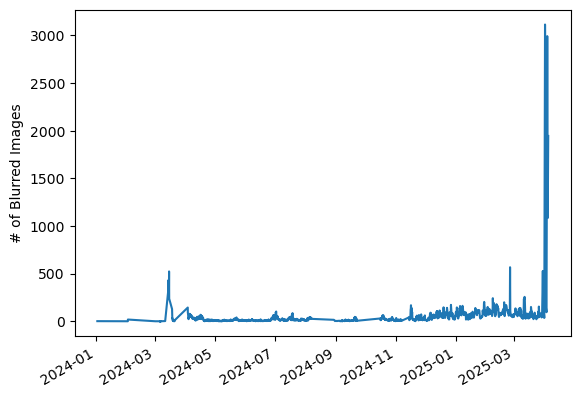

In [97]:
ax = df["n_blurred"].plot()
ax.set_ylabel("# of Blurred Images")
ax.set_xlabel("")